In [1]:
import pandas as pd
from pathlib import Path
import json
import matplotlib.pyplot as plt

In [2]:
# base_dir = Path(Path.home(), 'Dropbox/WHO_pfhrp/')
base_dir = Path('../')

## Transforming json to csv

In [3]:
with open(Path(base_dir, 'data/map/MAP_RDT_Demand_historical.json'), 'r') as f:
    MAP_rdt_past = json.load(f)
MAP_rdt_past

[{'countryIso3': 'AFG',
  'commodityDemand': [{'year': 2010,
    'rdtDemand': {'pub': 19839.22132, 'priv': 5018.34119},
    'actDemand': {'pub': 119141.67687, 'priv': 136646.63724},
    'nonActDemand': {'pub': 2954836.75726, 'priv': 1986550.86974},
    'breakdown': {'nTotalFeversUnder5': 44451374.29,
     'nCareseekingUnder5': {'pub': 13456963.45642, 'priv': 8262781.39136},
     'nCareseekingOver5': {'pub': 26428015.58695, 'priv': 19208709.03148},
     'nTotalCareseeking': {'pub': 39884979.04337, 'priv': 27471490.42283},
     'nTestedPosUnder5': {'pub': 0, 'priv': 0},
     'nTestedPosOver5': {'pub': 0, 'priv': 0},
     'nTestedPos': {'pub': 0, 'priv': 0},
     'nTestedNegUnder5': {'pub': 121425.30761, 'priv': 27381.11383},
     'nTestedNegOver5': {'pub': 238466.12445, 'priv': 63653.6081},
     'nTestedNeg': {'pub': 359891.43206, 'priv': 91034.72193},
     'nTotalTested': {'pub': 359891.43206, 'priv': 91034.72193},
     'nUntestedPosU5': {'pub': 0, 'priv': 0},
     'nUntestedPosO5': {'p

In [4]:
print(len(MAP_rdt_past))
# pd.json_normalize(MAP_rdt_past[0]['commodityDemand'], max_level=4)

75


In [5]:
MAP_rdt_df = pd.DataFrame()
for c in MAP_rdt_past:
    tmp = pd.json_normalize(c['commodityDemand'], max_level=2)
    tmp['countryIso3'] = c['countryIso3']
    MAP_rdt_df = pd.concat([MAP_rdt_df, tmp])
MAP_rdt_df.head()

year  rdtDemand.pub  rdtDemand.priv  actDemand.pub  actDemand.priv  \
0  2010    19839.22132      5018.34119   119141.67687    136646.63724   
1  2011    42455.08747      8434.04745   188775.13699    181242.93854   
2  2012    71688.99517     14078.21531   255018.70787    251532.35928   
3  2013   130174.49860     22279.73005   411627.34007    381174.17568   
4  2014   218888.00367     34580.70225   562450.69942    505782.58130   

   nonActDemand.pub  nonActDemand.priv  breakdown.nTotalFeversUnder5  \
0      2.954837e+06       1.986551e+06                   44451374.29   
1      3.346364e+06       2.074499e+06                   43447260.34   
2      3.371396e+06       2.397086e+06                   43336015.22   
3      3.606961e+06       2.520848e+06                   43170783.11   
4      3.901908e+06       2.816727e+06                   41832463.15   

   breakdown.nCareseekingUnder5.pub  breakdown.nCareseekingUnder5.priv  ...  \
0                      1.345696e+07                       8.262781e+06  ...   
1                      1.404764e+07                       8.012770e+06  ...   
2                      1.389155e+07                       9.030594e+06  ...   
3                      1.406851e+07                       9.070969e+06  ...   
4                      1.391860e+07                       9.265988e+06  ...   

   breakdown.nTestedPosGotAm.priv  breakdown.nTestedNegGotAm.pub  \
0                             0.0                    33525.89345   
1                             0.0                    65067.96546   
2                             0.0                    87916.44913   
3                             0.0                   133357.79804   
4                             0.0                   195666.57316   

   breakdown.nTestedNegGotAm.priv  breakdown.nUntestedPosGotAm.pub  \
0                     16966.22118                              0.0   
1                     21273.67225                              0.0   
2                     26355.95206                              0.0   
3                     30867.13460                              0.0   
4                     37773.32770                              0.0   

   breakdown.nUntestedPosGotAm.priv  breakdown.nUntestedNegGotAm.pub  \
0                               0.0                     3.040453e+06   
1                               0.0                     3.470071e+06   
2                               0.0                     3.538499e+06   
3                               0.0                     3.885231e+06   
4                               0.0                     4.268692e+06   

   breakdown.nUntestedNegGotAm.priv  breakdown.nTotalAm.pub  \
0                      2.106231e+06            3.073978e+06   
1                      2.234468e+06            3.535139e+06   
2                      2.622263e+06            3.626415e+06   
3                      2.871155e+06            4.018588e+06   
4                      3.284737e+06            4.464359e+06   

   breakdown.nTotalAm.priv  countryIso3  
0             2.123198e+06          AFG  
1             2.255742e+06          AFG  
2             2.648619e+06          AFG  
3             2.902022e+06          AFG  
4             3.322510e+06          AFG  

[5 rows x 51 columns]

In [6]:
MAP_rdt_df.shape

(825, 51)

In [7]:
cols = list(MAP_rdt_df.columns)
cols = [cols[-1]] + cols[:-1]
cols
MAP_rdt_df = MAP_rdt_df[cols]
MAP_rdt_df.to_csv(Path(base_dir, 'data/map/MAP_RDT_Demand_historical.csv'), index=False)

## Processing

In [8]:
MAP_rdt_df = pd.read_csv(Path(base_dir, 'data/map/MAP_RDT_Demand_historical.csv'))
MAP_rdt_df.columns

Index(['countryIso3', 'year', 'rdtDemand.pub', 'rdtDemand.priv',
       'actDemand.pub', 'actDemand.priv', 'nonActDemand.pub',
       'nonActDemand.priv', 'breakdown.nTotalFeversUnder5',
       'breakdown.nCareseekingUnder5.pub', 'breakdown.nCareseekingUnder5.priv',
       'breakdown.nCareseekingOver5.pub', 'breakdown.nCareseekingOver5.priv',
       'breakdown.nTotalCareseeking.pub', 'breakdown.nTotalCareseeking.priv',
       'breakdown.nTestedPosUnder5.pub', 'breakdown.nTestedPosUnder5.priv',
       'breakdown.nTestedPosOver5.pub', 'breakdown.nTestedPosOver5.priv',
       'breakdown.nTestedPos.pub', 'breakdown.nTestedPos.priv',
       'breakdown.nTestedNegUnder5.pub', 'breakdown.nTestedNegUnder5.priv',
       'breakdown.nTestedNegOver5.pub', 'breakdown.nTestedNegOver5.priv',
       'breakdown.nTestedNeg.pub', 'breakdown.nTestedNeg.priv',
       'breakdown.nTotalTested.pub', 'breakdown.nTotalTested.priv',
       'breakdown.nUntestedPosU5.pub', 'breakdown.nUntestedPosU5.priv',
       'b

In [9]:
# country

##
## seeking treatment (given fever)
##
# frac_sought_public = breakdown.nTotalCareseeking.pub / (breakdown.nTotalCareseeking.pub + breakdown.nTotalCareseeking.priv)
# frac_sought_private = breakdown.nTotalCareseeking.priv / (breakdown.nTotalCareseeking.pub + breakdown.nTotalCareseeking.priv)

##
## testing given seeking treatment
##
# frac_sought_public_tested = breakdown.nTotalTested.pub / breakdown.nTotalCareseeking.pub
# frac_sought_public_untested = (breakdown.nUntestedPos.pub + breakdown.nUntestedNeg.pub) / breakdown.nTotalCareseeking.pub

# frac_sought_private_tested = breakdown.nTotalTested.priv / breakdown.nTotalCareseeking.priv
# frac_sought_private_untested = (breakdown.nUntestedPos.priv + breakdown.nUntestedNeg.priv) / breakdown.nTotalCareseeking.priv

##
## infected/clean given test/untested results
## 
# frac_sought_public_tested_pos = breakdown.nTestedPos.pub / breakdown.nTotalTested.pub
# frac_sought_public_tested_neg = breakdown.nTestedNeg.pub / breakdown.nTotalTested.pub

# frac_sought_public_untested_pos = breakdown.nUntestedPos.pub / (breakdown.nUntestedPos.pub + breakdown.nUntestedNeg.pub)
# frac_sought_public_untested_neg = breakdown.nUntestedNeg.pub / (breakdown.nUntestedPos.pub + breakdown.nUntestedNeg.pub)

# frac_sought_private_tested_pos = breakdown.nTestedPos.priv / breakdown.nTotalTested.priv
# frac_sought_private_tested_neg = breakdown.nTestedNeg.priv / breakdown.nTotalTested.priv

# frac_sought_private_untested_pos = breakdown.nUntestedPos.priv / (breakdown.nUntestedPos.priv + breakdown.nUntestedNeg.priv)
# frac_sought_private_untested_neg = breakdown.nUntestedNeg.priv / (breakdown.nUntestedPos.priv + breakdown.nUntestedNeg.priv)

## 
## antimalarial given infected/clean
##
# frac_sought_public_tested_pos_treated = breakdown.nTestedPosGotAm.pub / breakdown.nTestedPos.pub
# frac_sought_public_tested_pos_untreated = (breakdown.nTestedPos.pub - breakdown.nTestedPosGotAm.pub) / breakdown.nTestedPos.pub

# frac_sought_public_tested_neg_treated = breakdown.nTestedNegGotAm.pub / breakdown.nTestedNeg.pub
# frac_sought_public_tested_neg_untreated = (breakdown.nTestedNeg.pub - breakdown.nTestedNegGotAm.pub) / breakdown.nTestedNeg.pub

# frac_sought_public_untested_pos_treated = breakdown.nUntestedPosGotAm.pub / breakdown.nUntestedPos.pub
# frac_sought_public_untested_pos_untreated = (breakdown.nUntestedPos.pub - breakdown.nUntestedPosGotAm.pub) / breakdown.nUntestedPos.pub

# frac_sought_public_untested_neg_treated = breakdown.nUntestedNegGotAm.pub / breakdown.nUntestedNeg.pub
# frac_sought_public_untested_neg_untreated = (breakdown.nUntestedNeg.pub - breakdown.nUntestedNegGotAm.pub) / breakdown.nUntestedNeg.pub

# frac_sought_private_tested_pos_treated = breakdown.nTestedPosGotAm.priv / breakdown.nTestedPos.priv
# frac_sought_private_tested_pos_untreated = (breakdown.nTestedPos.priv - breakdown.nTestedPosGotAm.priv) / breakdown.nTestedPos.priv

# frac_sought_private_tested_neg_treated = breakdown.nTestedNegGotAm.priv / breakdown.nTestedNeg.priv
# frac_sought_private_tested_neg_untreated = (breakdown.nTestedNeg.priv - breakdown.nTestedNegGotAm.priv) / breakdown.nTestedNeg.priv

# frac_sought_private_untested_pos_treated = breakdown.nUntestedPosGotAm.priv / breakdown.nUntestedPos.priv
# frac_sought_private_untested_pos_untreated = (breakdown.nUntestedPos.priv - breakdown.nUntestedPosGotAm.priv) / breakdown.nUntestedPos.priv

# frac_sought_private_untested_neg_treated = breakdown.nUntestedNegGotAm.priv / breakdown.nUntestedNeg.priv
# frac_sought_private_untested_neg_untreated = (breakdown.nUntestedNeg.priv - breakdown.nUntestedNegGotAm.priv) / breakdown.nUntestedNeg.priv

##
## fraction RDT among all tests
##
# frac_rdt_public = rdtDemand.pub / breakdown.nTotalTested.pub
# frac_rdt_private = rdtDemand.priv / breakdown.nTotalTested.priv

##
## fraction ACT among all antimalarials
##
# frac_act_public = actDemand.pub / (actDemand.pub + nonActDemand.pub)
# frac_act_private = actDemand.priv / (actDemand.priv + nonActDemand.priv)

In [98]:
# import numpy as np
# len(iso[ np.isin(iso.iso3, model_frac.countryIso3 )]['country'].to_list())

iso = pd.read_csv(Path(base_dir, 'data/country_iso_code.csv')) ## map ISO3 and country name
# iso.head()

model_frac = pd.DataFrame()
model_frac['countryIso3'] = MAP_rdt_df['countryIso3']
model_frac = pd.merge(left=model_frac, right=iso[['iso3', 'country']], left_on='countryIso3', right_on='iso3', how='left').drop(columns=['iso3'])
# model_frac['country'] = iso[[x in model_frac.countryIso3.to_list() for x in iso.iso3]]['country'].to_list()

model_frac['year'] = MAP_rdt_df['year']

## seeking treatment (given fever)
model_frac['frac_sought_public'] = MAP_rdt_df['breakdown.nTotalCareseeking.pub'] / (MAP_rdt_df['breakdown.nTotalCareseeking.pub'] + MAP_rdt_df['breakdown.nTotalCareseeking.priv'])
model_frac['frac_sought_private'] = MAP_rdt_df['breakdown.nTotalCareseeking.priv'] / (MAP_rdt_df['breakdown.nTotalCareseeking.pub'] + MAP_rdt_df['breakdown.nTotalCareseeking.priv'])

## testing given seeking treatment
model_frac['frac_sought_public_tested'] = MAP_rdt_df['breakdown.nTotalTested.pub'] / MAP_rdt_df['breakdown.nTotalCareseeking.pub']
model_frac['frac_sought_public_untested'] = (MAP_rdt_df['breakdown.nUntestedPos.pub'] + MAP_rdt_df['breakdown.nUntestedNeg.pub']) / MAP_rdt_df['breakdown.nTotalCareseeking.pub']
model_frac['frac_sought_private_tested'] = MAP_rdt_df['breakdown.nTotalTested.priv'] / MAP_rdt_df['breakdown.nTotalCareseeking.priv']
model_frac['frac_sought_private_untested'] = (MAP_rdt_df['breakdown.nUntestedPos.priv'] + MAP_rdt_df['breakdown.nUntestedNeg.priv']) / MAP_rdt_df['breakdown.nTotalCareseeking.priv']

## infected/clean given test/untested results
model_frac['frac_sought_public_tested_pos'] = MAP_rdt_df['breakdown.nTestedPos.pub'] / MAP_rdt_df['breakdown.nTotalTested.pub']
model_frac['frac_sought_public_tested_neg'] = MAP_rdt_df['breakdown.nTestedNeg.pub'] / MAP_rdt_df['breakdown.nTotalTested.pub']
model_frac['frac_sought_public_untested_pos'] = MAP_rdt_df['breakdown.nUntestedPos.pub'] / (MAP_rdt_df['breakdown.nUntestedPos.pub'] + MAP_rdt_df['breakdown.nUntestedNeg.pub'])
model_frac['frac_sought_public_untested_neg'] = MAP_rdt_df['breakdown.nUntestedNeg.pub'] / (MAP_rdt_df['breakdown.nUntestedPos.pub'] + MAP_rdt_df['breakdown.nUntestedNeg.pub'])
model_frac['frac_sought_private_tested_pos'] = MAP_rdt_df['breakdown.nTestedPos.priv'] / MAP_rdt_df['breakdown.nTotalTested.priv']
model_frac['frac_sought_private_tested_neg'] = MAP_rdt_df['breakdown.nTestedNeg.priv'] / MAP_rdt_df['breakdown.nTotalTested.priv']
model_frac['frac_sought_private_untested_pos'] = MAP_rdt_df['breakdown.nUntestedPos.priv'] / (MAP_rdt_df['breakdown.nUntestedPos.priv'] + MAP_rdt_df['breakdown.nUntestedNeg.priv'])
model_frac['frac_sought_private_untested_neg'] = MAP_rdt_df['breakdown.nUntestedNeg.priv'] / (MAP_rdt_df['breakdown.nUntestedPos.priv'] + MAP_rdt_df['breakdown.nUntestedNeg.priv'])

## antimalarial given infected/clean
model_frac['frac_sought_public_tested_pos_treated'] = MAP_rdt_df['breakdown.nTestedPosGotAm.pub'] / MAP_rdt_df['breakdown.nTestedPos.pub']
model_frac['frac_sought_public_tested_pos_untreated'] = (MAP_rdt_df['breakdown.nTestedPos.pub'] - MAP_rdt_df['breakdown.nTestedPosGotAm.pub']) / MAP_rdt_df['breakdown.nTestedPos.pub']
model_frac['frac_sought_public_tested_neg_treated'] = MAP_rdt_df['breakdown.nTestedNegGotAm.pub'] / MAP_rdt_df['breakdown.nTestedNeg.pub']
model_frac['frac_sought_public_tested_neg_untreated'] = (MAP_rdt_df['breakdown.nTestedNeg.pub'] - MAP_rdt_df['breakdown.nTestedNegGotAm.pub']) / MAP_rdt_df['breakdown.nTestedNeg.pub']
model_frac['frac_sought_public_untested_pos_treated'] = MAP_rdt_df['breakdown.nUntestedPosGotAm.pub'] / MAP_rdt_df['breakdown.nUntestedPos.pub']
model_frac['frac_sought_public_untested_pos_untreated'] = (MAP_rdt_df['breakdown.nUntestedPos.pub'] - MAP_rdt_df['breakdown.nUntestedPosGotAm.pub']) / MAP_rdt_df['breakdown.nUntestedPos.pub']
model_frac['frac_sought_public_untested_neg_treated'] = MAP_rdt_df['breakdown.nUntestedNegGotAm.pub'] / MAP_rdt_df['breakdown.nUntestedNeg.pub']
model_frac['frac_sought_public_untested_neg_untreated'] = (MAP_rdt_df['breakdown.nUntestedNeg.pub'] - MAP_rdt_df['breakdown.nUntestedNegGotAm.pub']) / MAP_rdt_df['breakdown.nUntestedNeg.pub']
model_frac['frac_sought_private_tested_pos_treated'] = MAP_rdt_df['breakdown.nTestedPosGotAm.priv'] / MAP_rdt_df['breakdown.nTestedPos.priv']
model_frac['frac_sought_private_tested_pos_untreated'] = (MAP_rdt_df['breakdown.nTestedPos.priv'] - MAP_rdt_df['breakdown.nTestedPosGotAm.priv']) / MAP_rdt_df['breakdown.nTestedPos.priv']
model_frac['frac_sought_private_tested_neg_treated'] = MAP_rdt_df['breakdown.nTestedNegGotAm.priv'] / MAP_rdt_df['breakdown.nTestedNeg.priv']
model_frac['frac_sought_private_tested_neg_untreated'] = (MAP_rdt_df['breakdown.nTestedNeg.priv'] - MAP_rdt_df['breakdown.nTestedNegGotAm.priv']) / MAP_rdt_df['breakdown.nTestedNeg.priv']
model_frac['frac_sought_private_untested_pos_treated'] = MAP_rdt_df['breakdown.nUntestedPosGotAm.priv'] / MAP_rdt_df['breakdown.nUntestedPos.priv']
model_frac['frac_sought_private_untested_pos_untreated'] = (MAP_rdt_df['breakdown.nUntestedPos.priv'] - MAP_rdt_df['breakdown.nUntestedPosGotAm.priv']) / MAP_rdt_df['breakdown.nUntestedPos.priv']
model_frac['frac_sought_private_untested_neg_treated'] = MAP_rdt_df['breakdown.nUntestedNegGotAm.priv'] / MAP_rdt_df['breakdown.nUntestedNeg.priv']
model_frac['frac_sought_private_untested_neg_untreated'] = (MAP_rdt_df['breakdown.nUntestedNeg.priv'] - MAP_rdt_df['breakdown.nUntestedNegGotAm.priv']) / MAP_rdt_df['breakdown.nUntestedNeg.priv']

## fraction RDT among all tests
model_frac['frac_rdt_public'] = MAP_rdt_df['rdtDemand.pub'] / MAP_rdt_df['breakdown.nTotalTested.pub']
model_frac['frac_rdt_private'] = MAP_rdt_df['rdtDemand.priv'] / MAP_rdt_df['breakdown.nTotalTested.priv']

## fraction ACT among all antimalarials
model_frac['frac_act_public'] = MAP_rdt_df['actDemand.pub'] / (MAP_rdt_df['actDemand.pub'] + MAP_rdt_df['nonActDemand.pub'])
model_frac['frac_act_private'] = MAP_rdt_df['actDemand.priv'] / (MAP_rdt_df['actDemand.priv'] + MAP_rdt_df['nonActDemand.priv'])

model_frac.head()

countryIso3      country  year  frac_sought_public  frac_sought_private  \
0         AFG  Afghanistan  2010            0.592148             0.407852   
1         AFG  Afghanistan  2011            0.610586             0.389414   
2         AFG  Afghanistan  2012            0.577596             0.422404   
3         AFG  Afghanistan  2013            0.579660             0.420340   
4         AFG  Afghanistan  2014            0.571423             0.428577   

   frac_sought_public_tested  frac_sought_public_untested  \
0                   0.009023                     0.990977   
1                   0.013824                     0.986176   
2                   0.017903                     0.982097   
3                   0.024376                     0.975624   
4                   0.031854                     0.968146   

   frac_sought_private_tested  frac_sought_private_untested  \
0                    0.003314                      0.996686   
1                    0.004306                      0.995694   
2                    0.004807                      0.995193   
3                    0.005753                      0.994247   
4                    0.006710                      0.993290   

   frac_sought_public_tested_pos  ...  frac_sought_private_tested_neg_treated  \
0                            0.0  ...                                0.186371   
1                            0.0  ...                                0.185303   
2                            0.0  ...                                0.182111   
3                            0.0  ...                                0.176977   
4                            0.0  ...                                0.181318   

   frac_sought_private_tested_neg_untreated  \
0                                  0.813629   
1                                  0.814697   
2                                  0.817889   
3                                  0.823023   
4                                  0.818682   

   frac_sought_private_untested_pos_treated  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   

   frac_sought_private_untested_pos_untreated  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   

   frac_sought_private_untested_neg_treated  \
0                                  0.076925   
1                                  0.084170   
2                                  0.087526   
3                                  0.095258   
4                                  0.106508   

   frac_sought_private_untested_neg_untreated  frac_rdt_public  \
0                                    0.923075         0.055126   
1                                    0.915830         0.073464   
2                                    0.912474         0.097276   
3                                    0.904742         0.127741   
4                                    0.893492         0.165993   

   frac_rdt_private  frac_act_public  frac_act_private  
0          0.055126         0.038758          0.064359  
1          0.073464         0.053400          0.080347  
2          0.097276         0.070323          0.094967  
3          0.127741         0.102431          0.131348  
4          0.165993         0.125987          0.152229  

[5 rows x 37 columns]

In [99]:
countries = model_frac.countryIso3.unique()
len(countries)

75

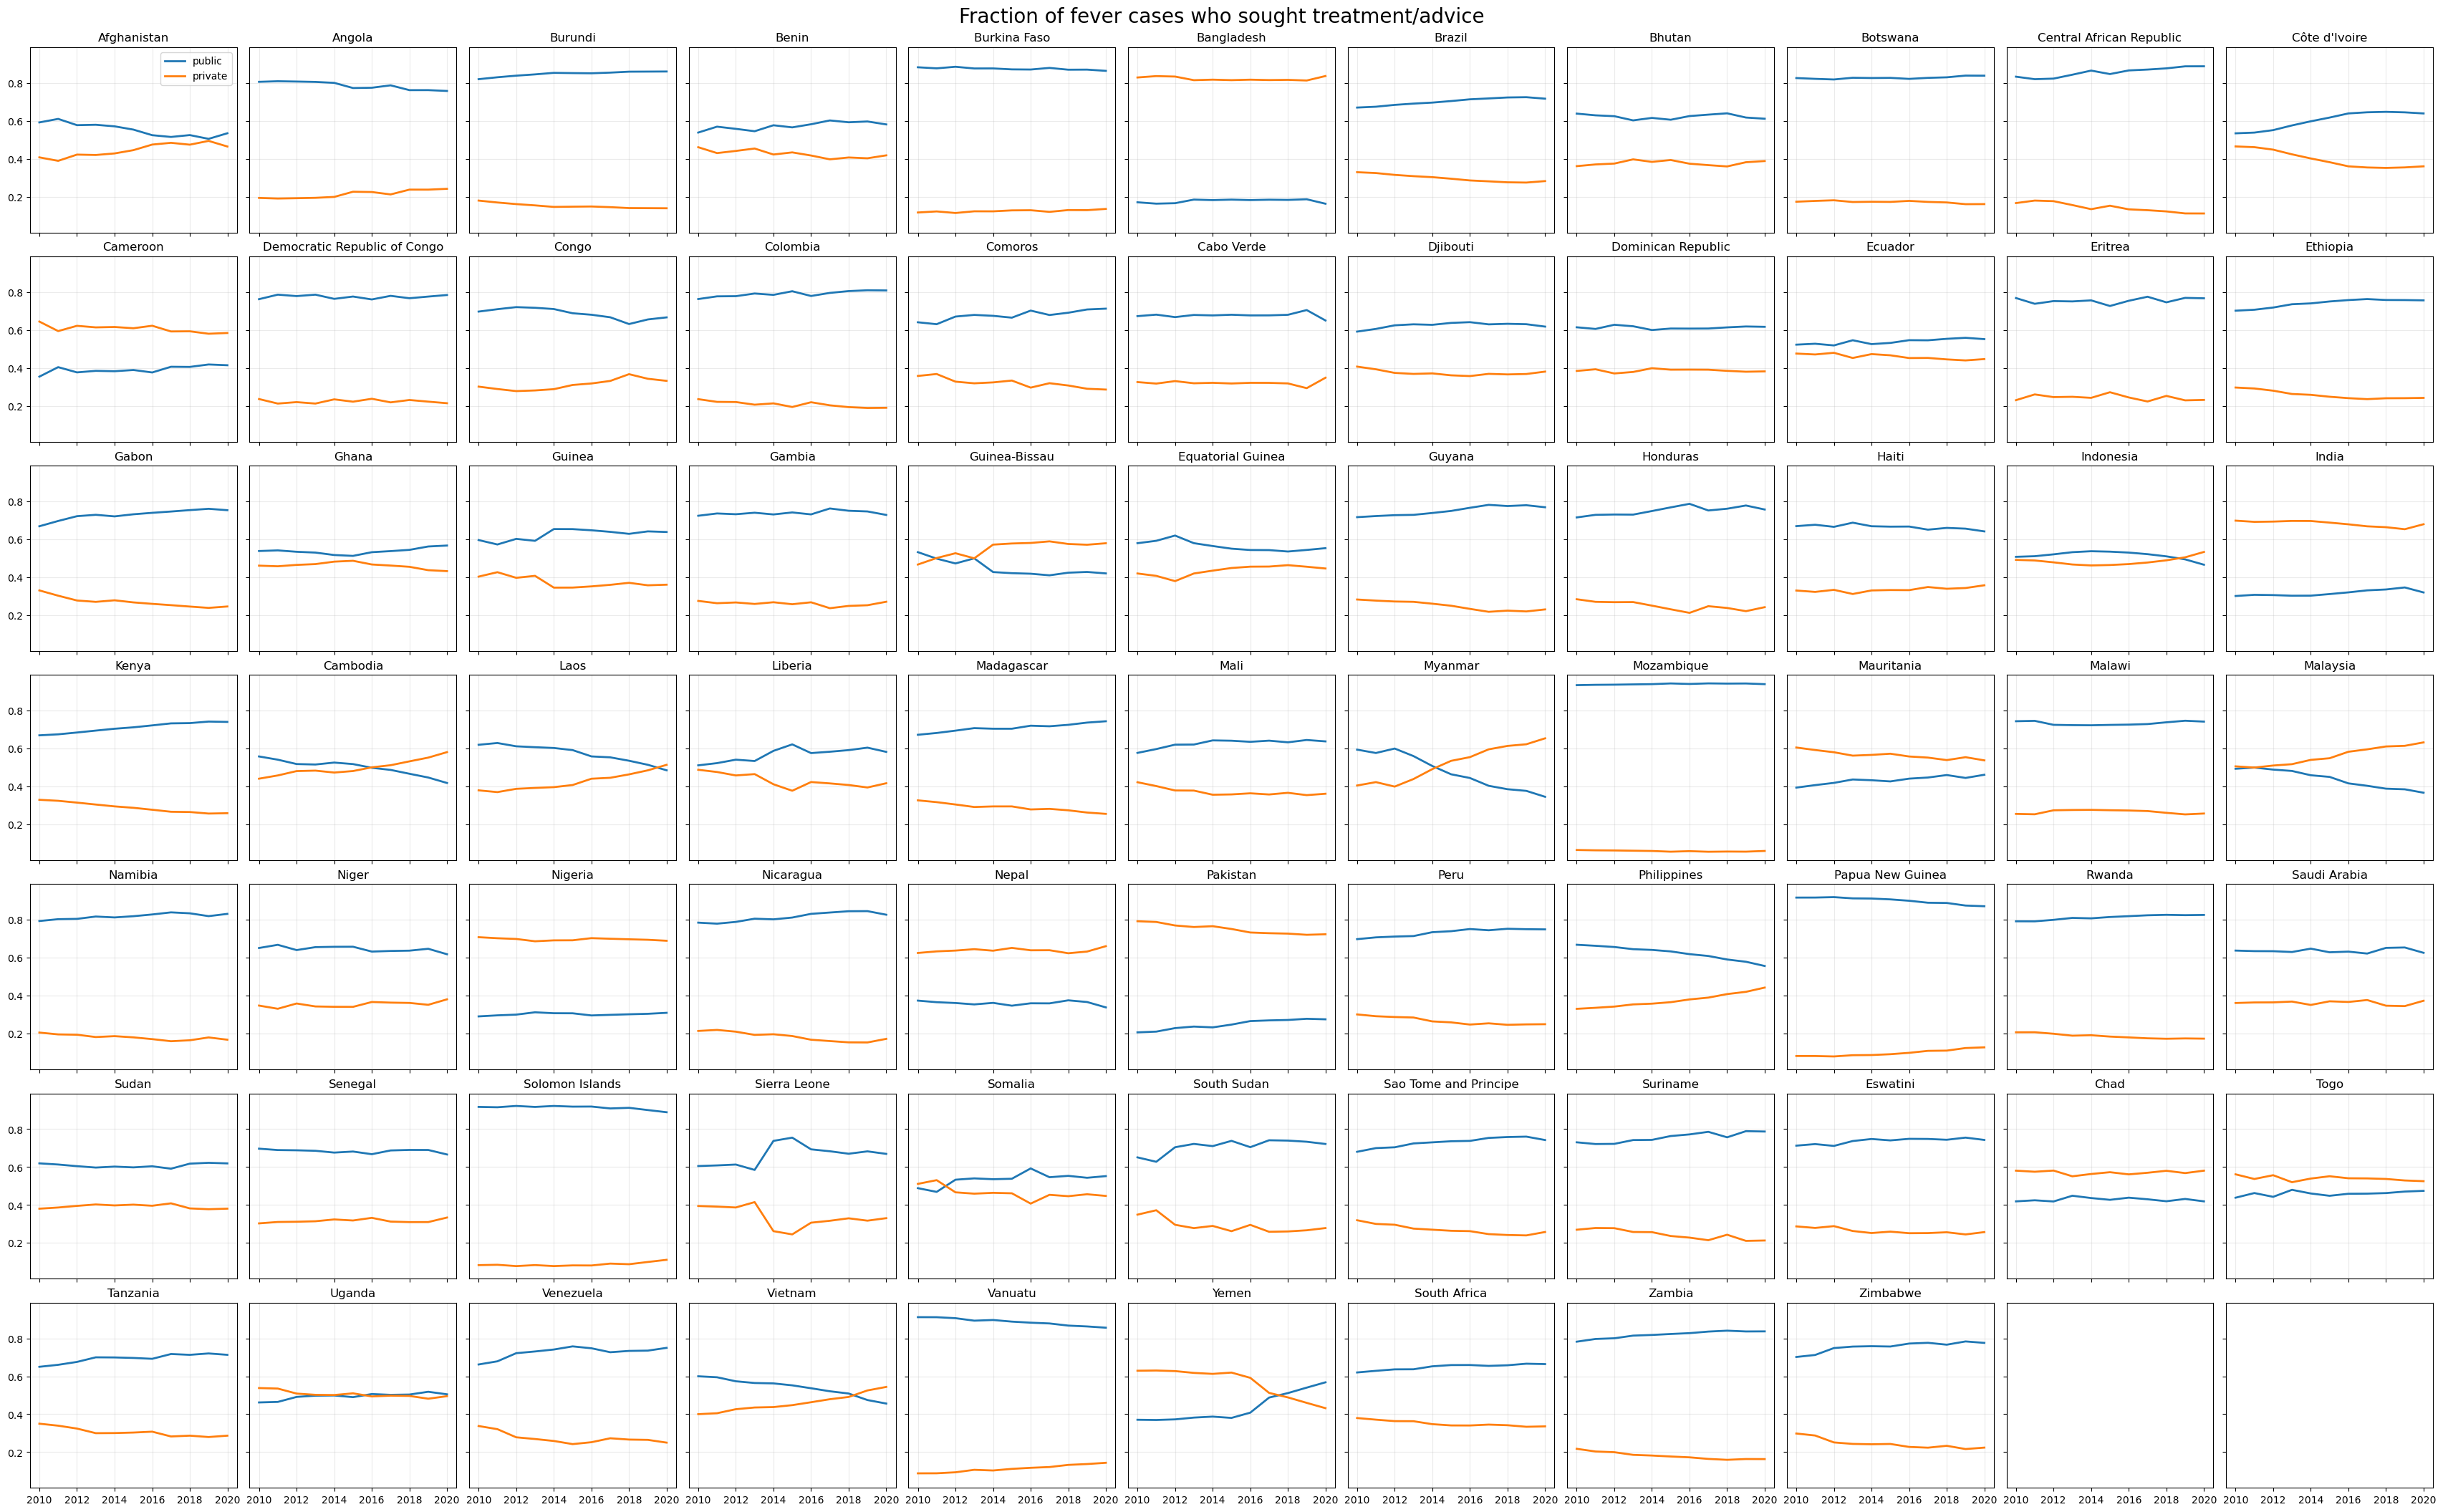

In [100]:
fig, axs = plt.subplots(nrows=7, ncols=11, figsize=(34, 21), sharex=True, sharey=True, constrained_layout=True)

for ic, c in enumerate(countries):
    tmp = model_frac[model_frac['countryIso3']==c]
    axs.flat[ic].plot(tmp['year'], tmp['frac_sought_public'], lw=2, label='public')
    axs.flat[ic].plot(tmp['year'], tmp['frac_sought_private'], lw=2, label='private')
    axs.flat[ic].grid(alpha=0.25)
    axs.flat[ic].set_title( tmp.iloc[-1]['country'] )
axs[0,0].legend()
fig.suptitle('Fraction of fever cases who sought treatment/advice', fontsize=20)
fig.savefig(Path(base_dir, 'task_1/MAP_RDT_Demand_sought.pdf'), dpi=300)

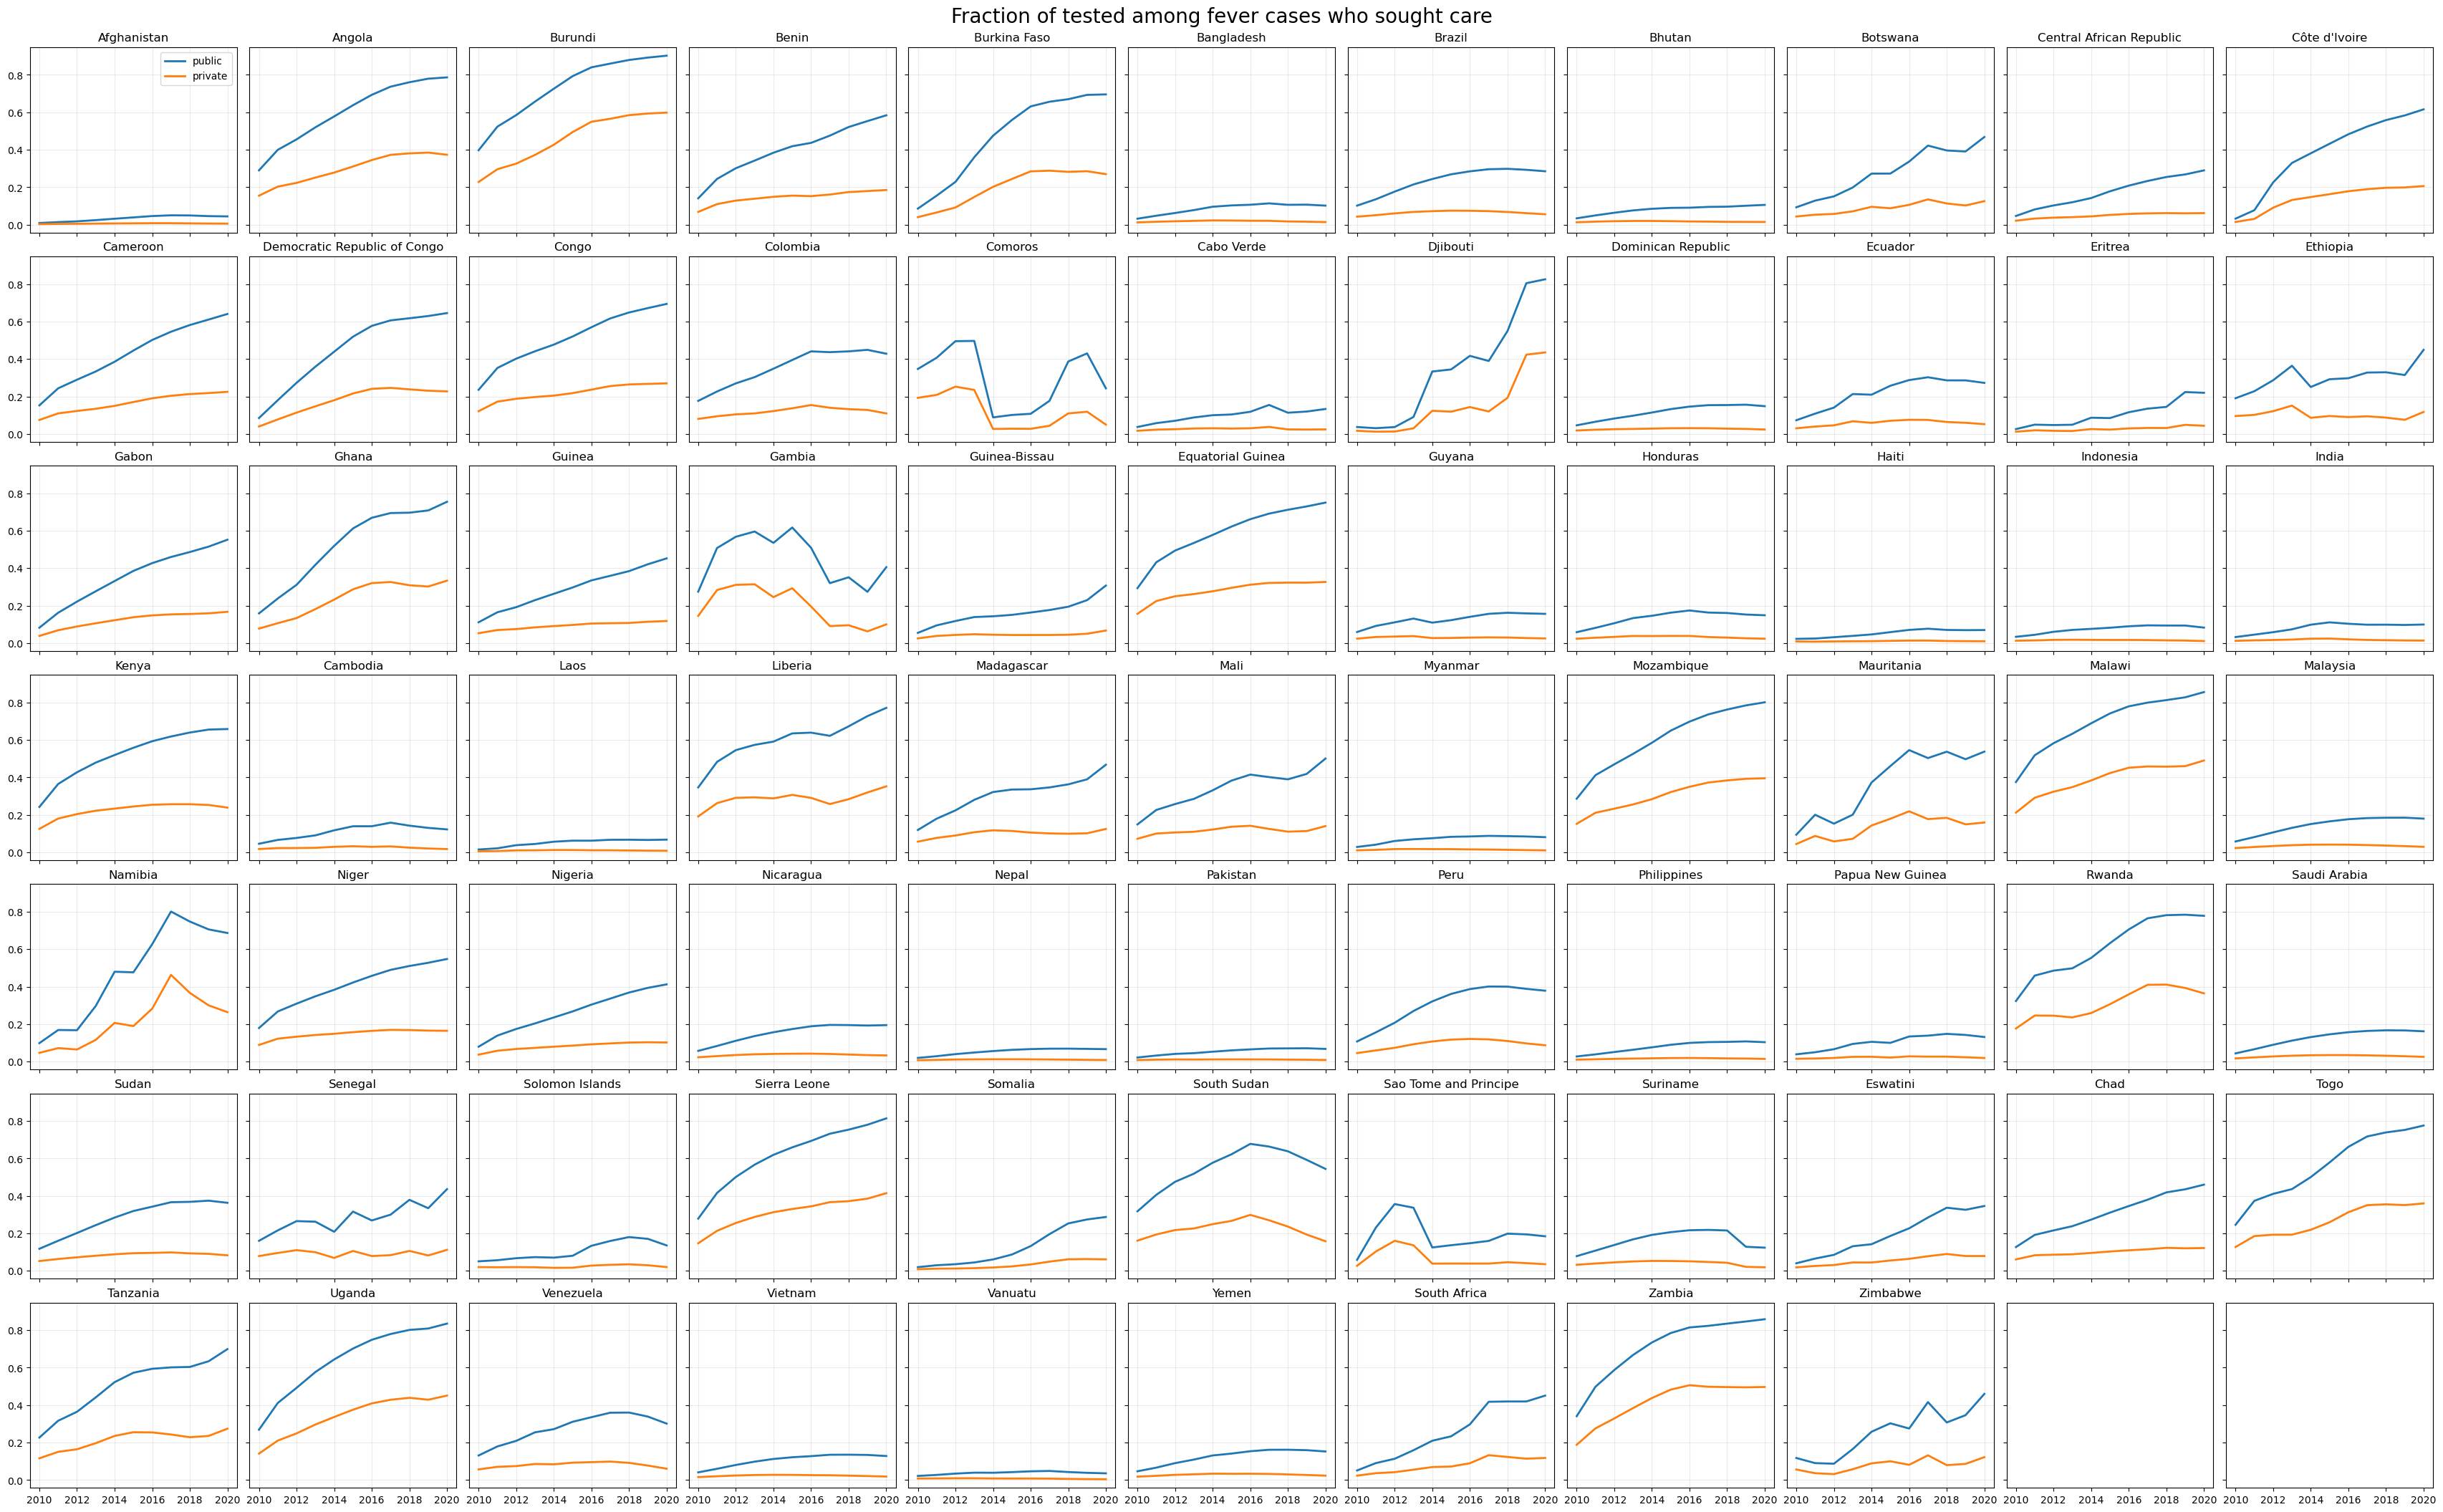

In [101]:
fig, axs = plt.subplots(nrows=7, ncols=11, figsize=(34, 21), sharex=True, sharey=True, constrained_layout=True)

for ic, c in enumerate(countries):
    tmp = model_frac[model_frac['countryIso3']==c]
    axs.flat[ic].plot(tmp['year'], tmp['frac_sought_public_tested'], lw=2, label='public')
    axs.flat[ic].plot(tmp['year'], tmp['frac_sought_private_tested'], lw=2, label='private')
    axs.flat[ic].grid(alpha=0.25)
    axs.flat[ic].set_title( tmp.iloc[-1]['country'] )
axs[0,0].legend()
fig.suptitle('Fraction of tested among fever cases who sought care', fontsize=20)
fig.savefig(Path(base_dir, 'task_1/MAP_RDT_Demand_sought_tested.pdf'), dpi=300)

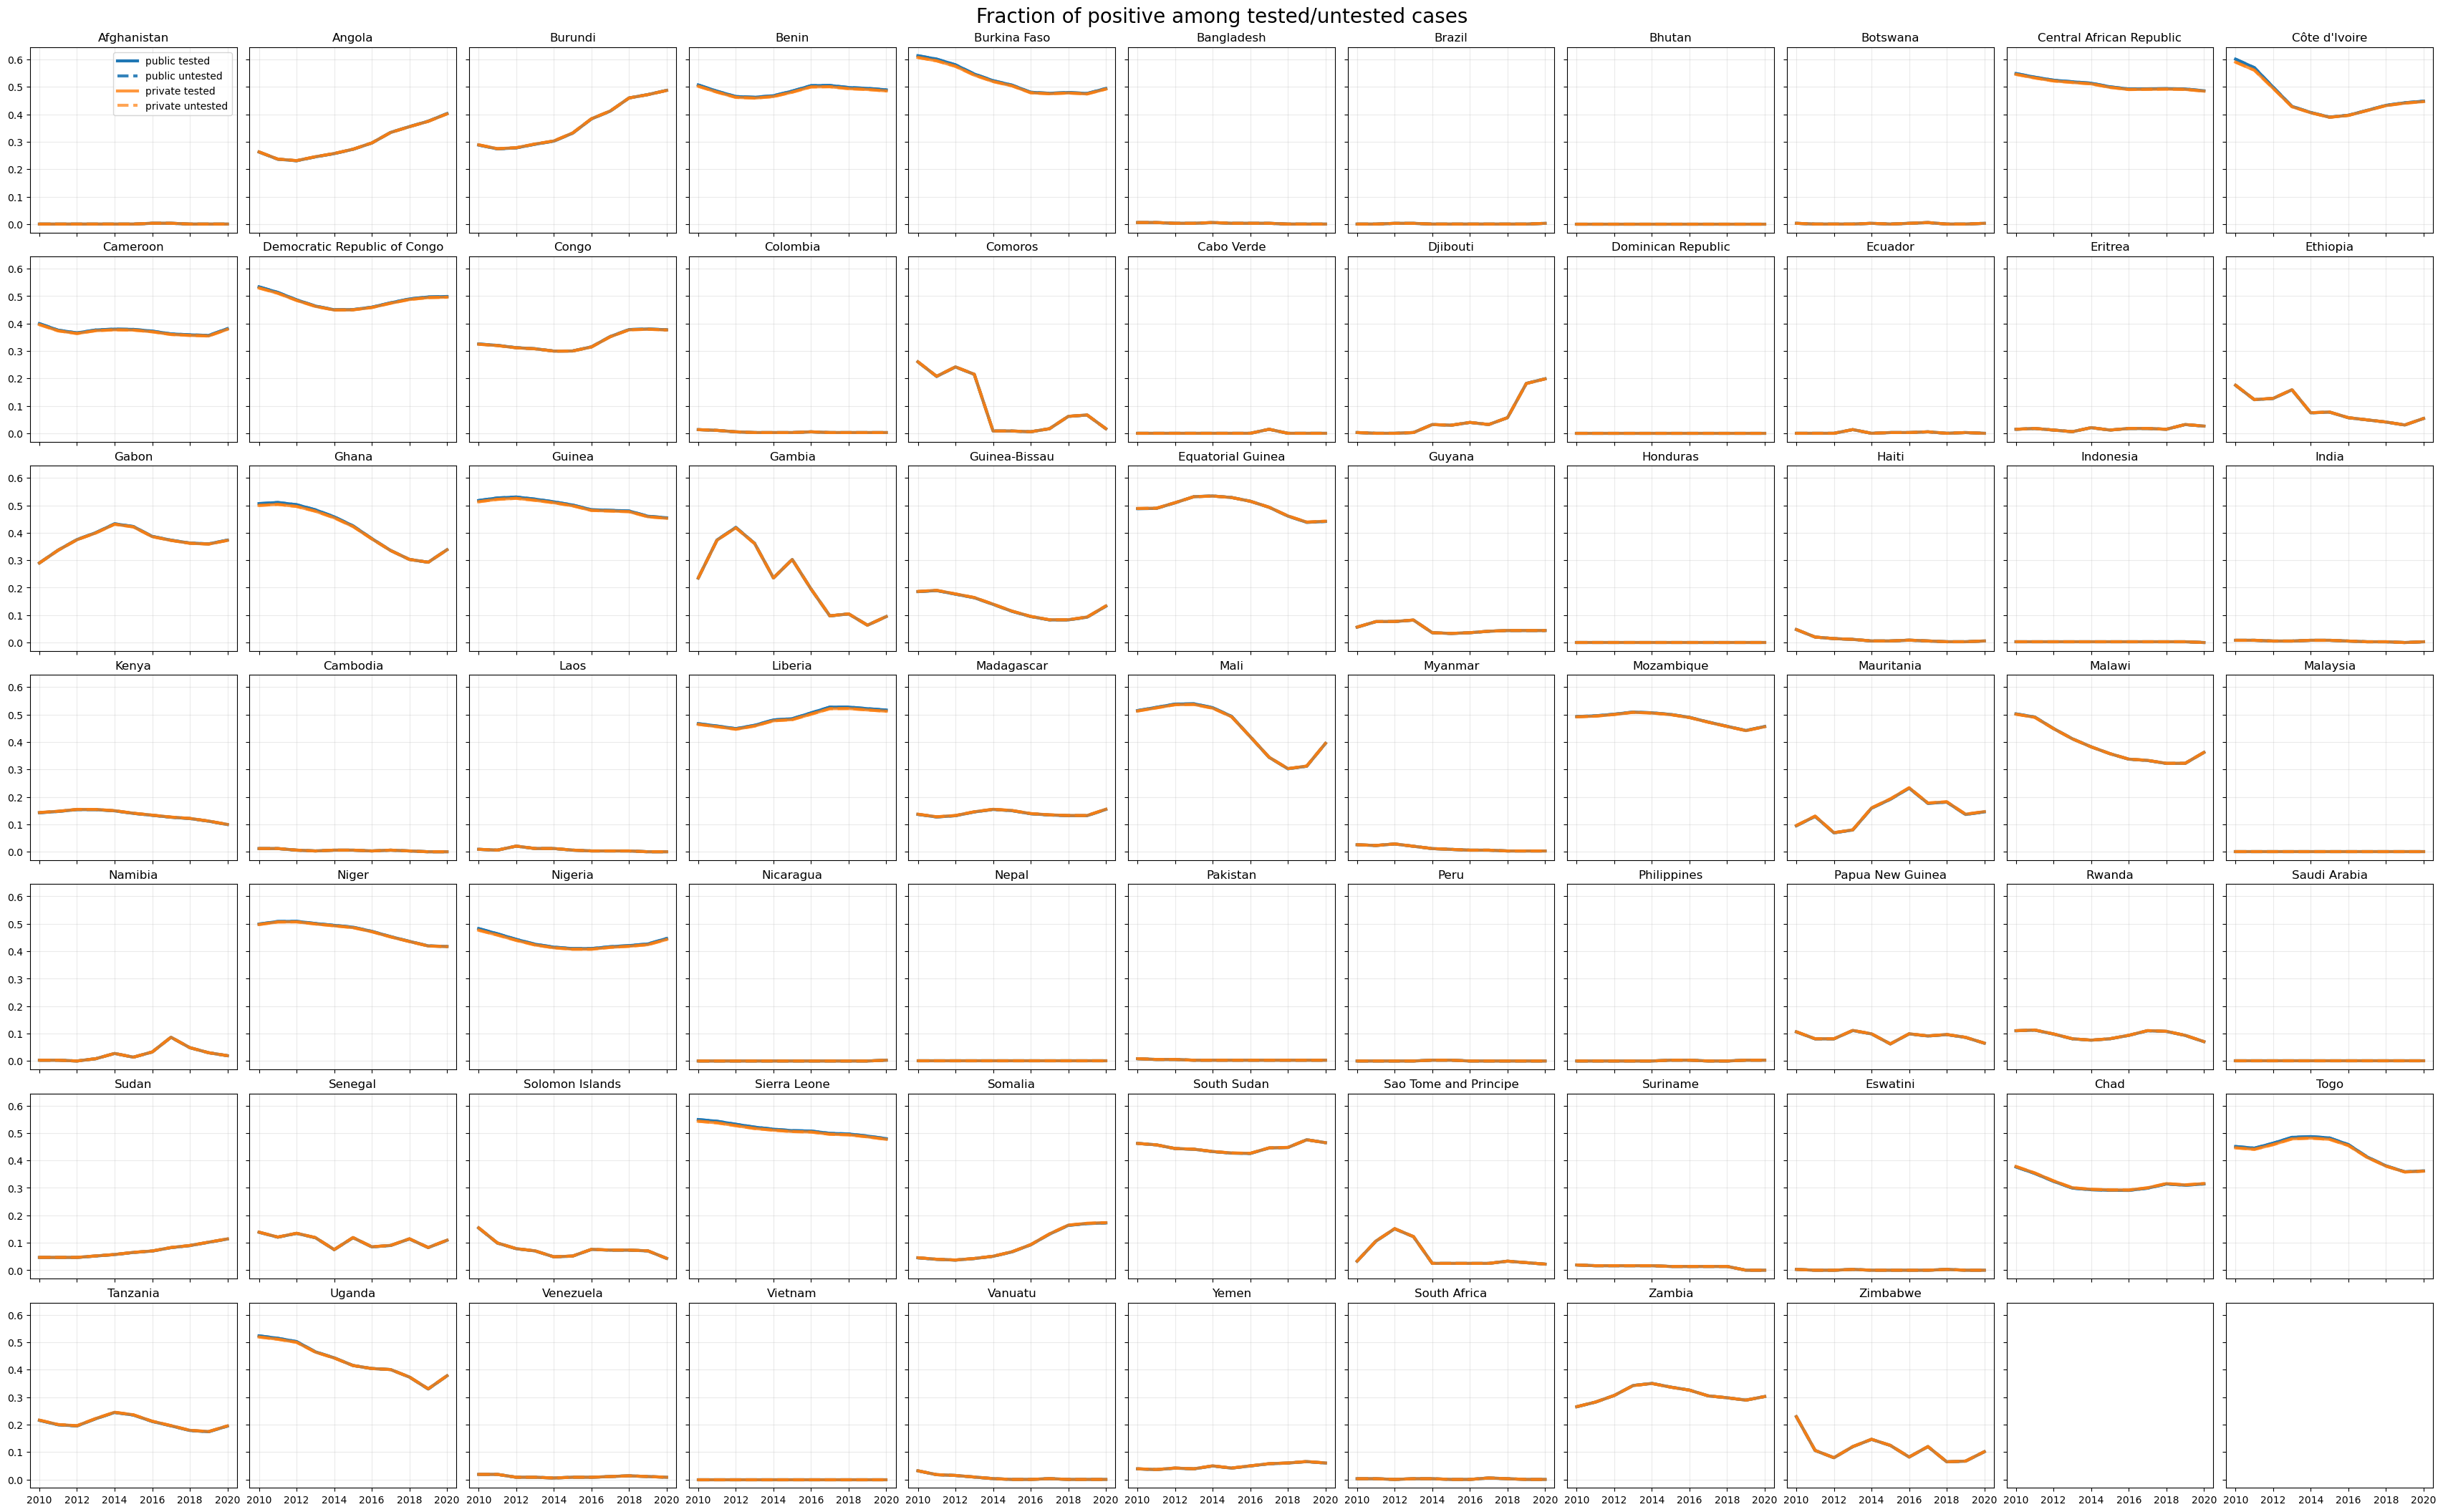

In [102]:
fig, axs = plt.subplots(nrows=7, ncols=11, figsize=(34, 21), sharex=True, sharey=True, constrained_layout=True)

for ic, c in enumerate(countries):
    tmp = model_frac[model_frac['countryIso3']==c]
    axs.flat[ic].plot(tmp['year'], tmp['frac_sought_public_tested_pos'], lw=3, color='tab:blue', ls='-', label='public tested')
    axs.flat[ic].plot(tmp['year'], tmp['frac_sought_public_untested_pos'], lw=3, color='tab:blue', ls='--', label='public untested', alpha=0.9)
    axs.flat[ic].plot(tmp['year'], tmp['frac_sought_private_tested_pos'], lw=3, color='tab:orange', ls='-', label='private tested', alpha=0.8)
    axs.flat[ic].plot(tmp['year'], tmp['frac_sought_private_untested_pos'], lw=3, color='tab:orange', ls='--', label='private untested', alpha=0.7)
    axs.flat[ic].grid(alpha=0.25)
    axs.flat[ic].set_title(tmp.iloc[-1]['country'])
axs[0,0].legend()
fig.suptitle('Fraction of positive among tested/untested cases', fontsize=20)
fig.savefig(Path(base_dir, 'task_1/MAP_RDT_Demand_sought_(un)tested_pos.pdf'), dpi=300)

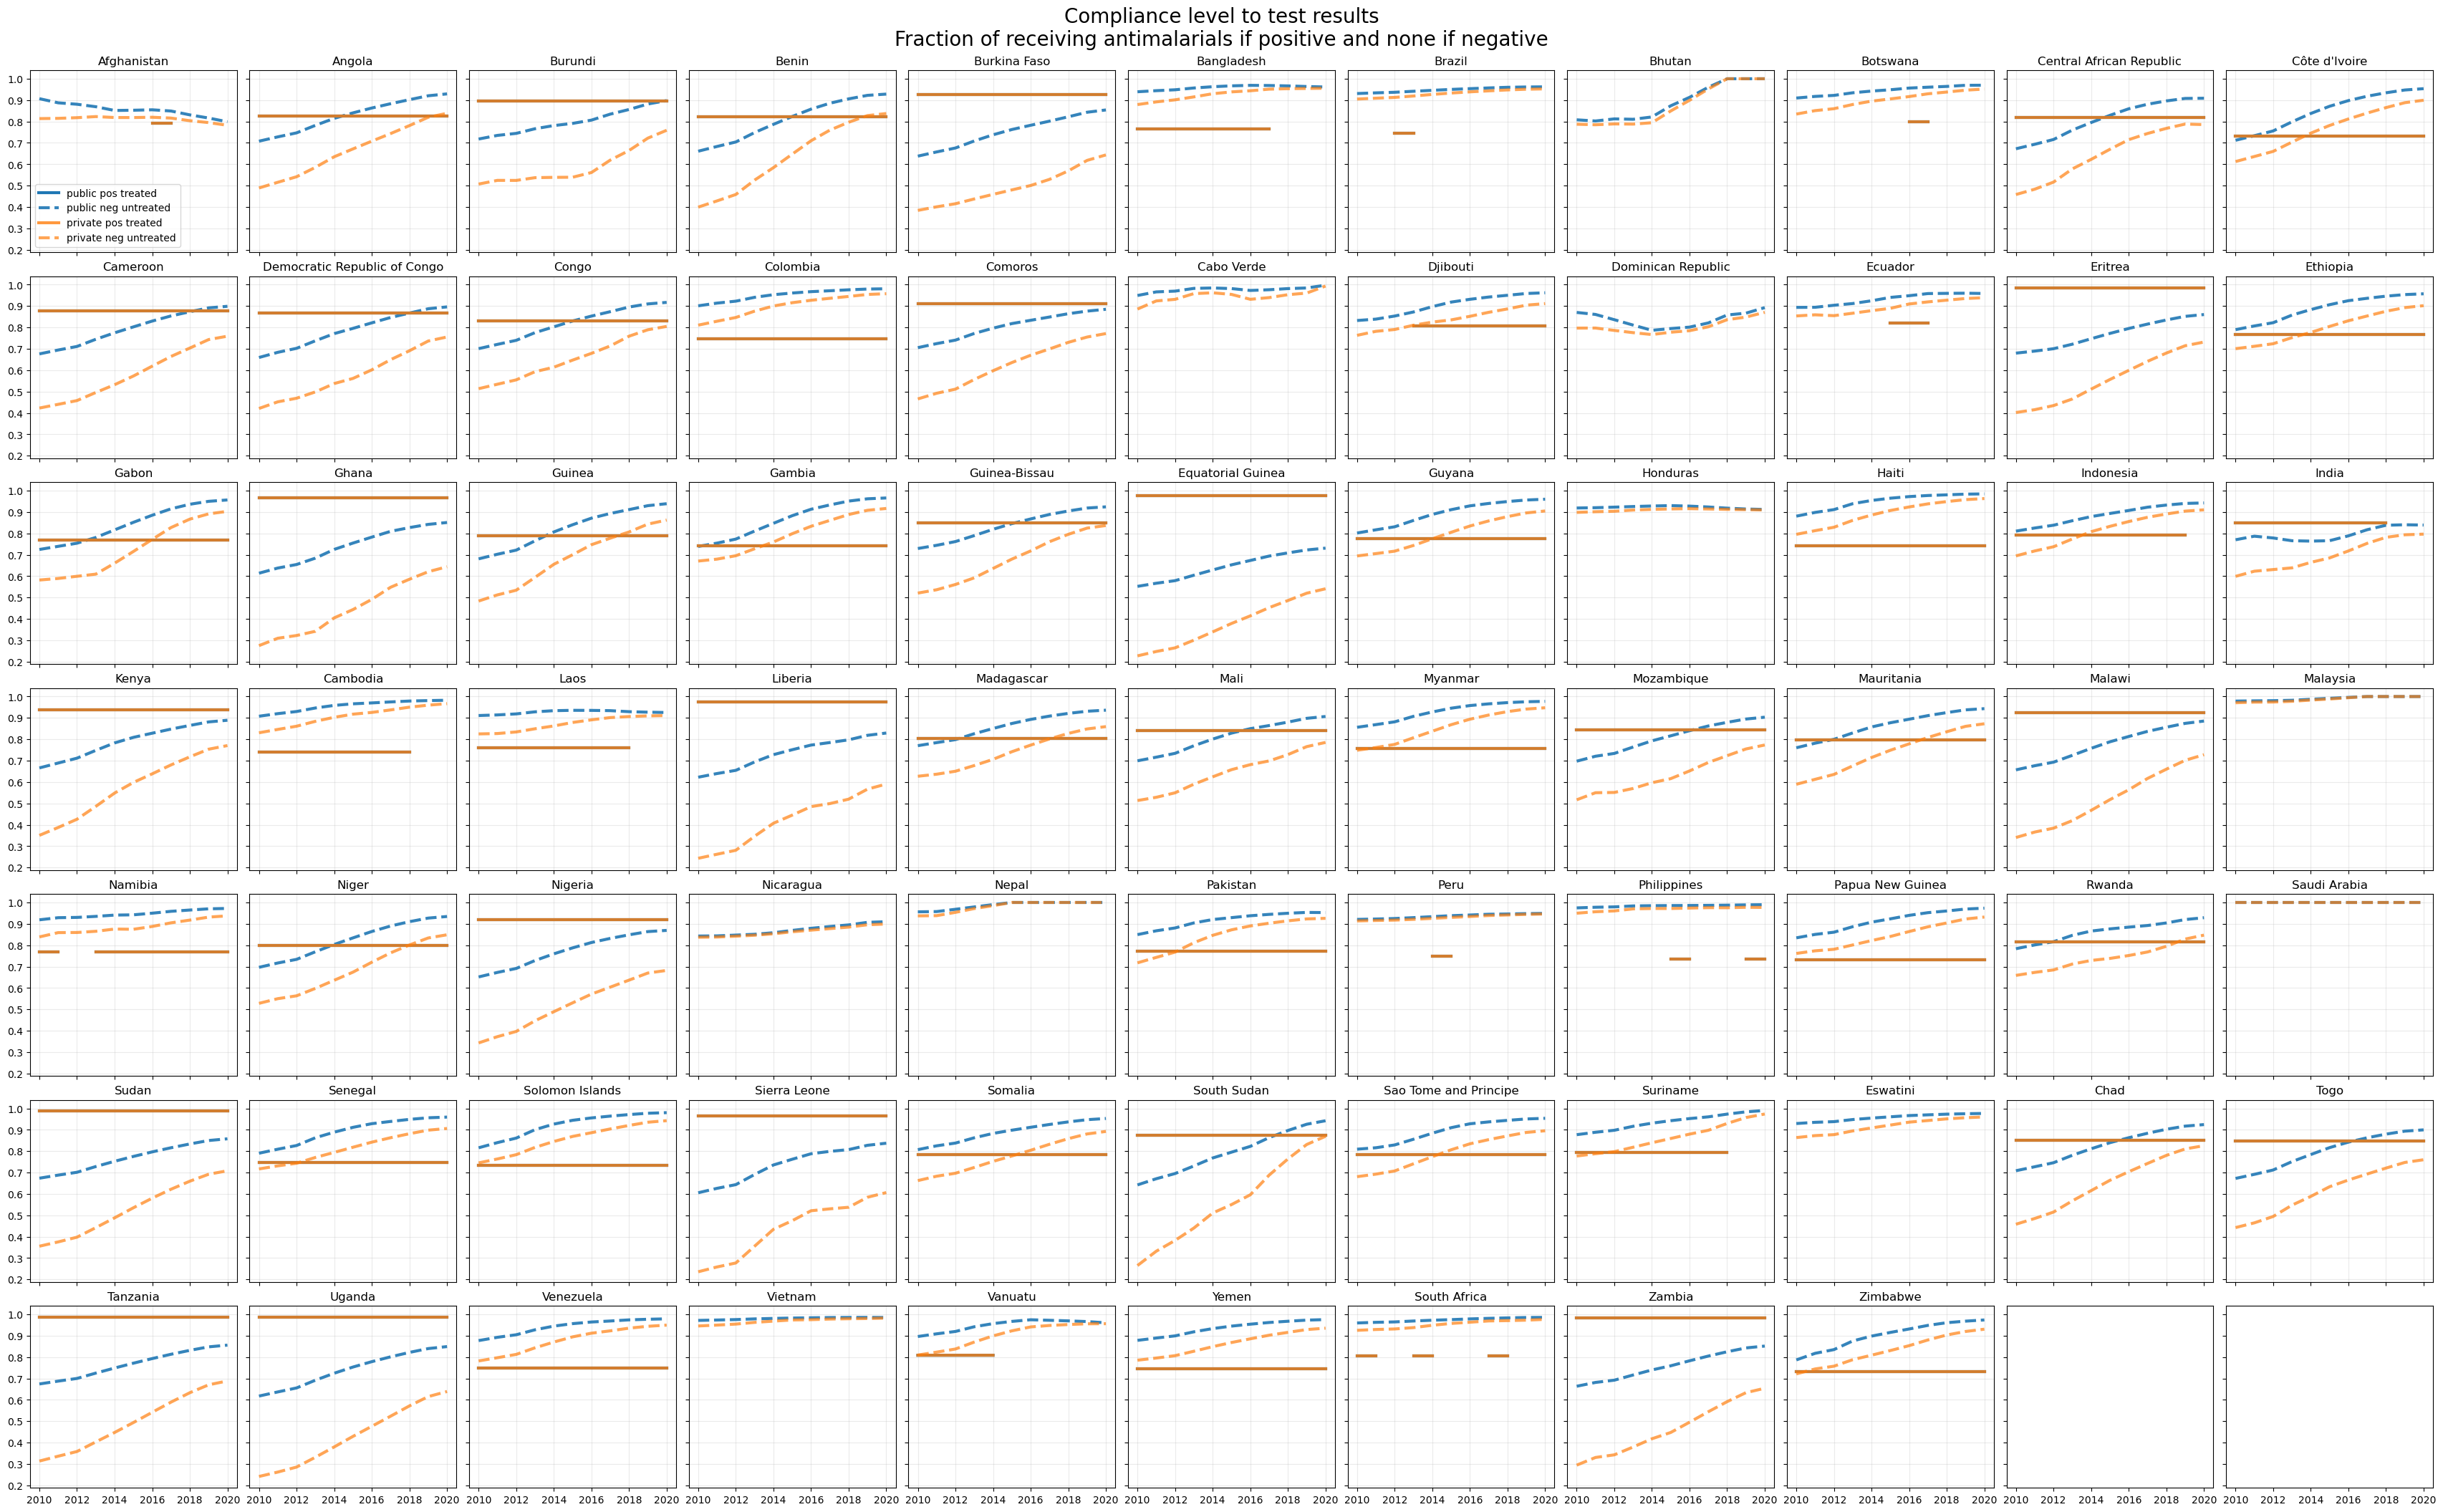

In [103]:
fig, axs = plt.subplots(nrows=7, ncols=11, figsize=(34, 21), sharex=True, sharey=True, constrained_layout=True)

for ic, c in enumerate(countries):
    tmp = model_frac[model_frac['countryIso3']==c]
    axs.flat[ic].plot(tmp['year'], tmp['frac_sought_public_tested_pos_treated'], lw=3, color='tab:blue', ls='-', label='public pos treated')
    axs.flat[ic].plot(tmp['year'], tmp['frac_sought_public_tested_neg_untreated'], lw=3, color='tab:blue', ls='--', label='public neg untreated', alpha=0.9)
    axs.flat[ic].plot(tmp['year'], tmp['frac_sought_private_tested_pos_treated'], lw=3, color='tab:orange', ls='-', label='private pos treated', alpha=0.8)
    axs.flat[ic].plot(tmp['year'], tmp['frac_sought_private_tested_neg_untreated'], lw=3, color='tab:orange', ls='--', label='private neg untreated', alpha=0.7)
    axs.flat[ic].grid(alpha=0.25)
    axs.flat[ic].set_title(tmp.iloc[0]['country'])
axs[0,0].legend()
fig.suptitle('Compliance level to test results\nFraction of receiving antimalarials if positive and none if negative', fontsize=20)
fig.savefig(Path(base_dir, 'task_1/MAP_RDT_Demand_sought_tested_(un)treated.pdf'), dpi=300)

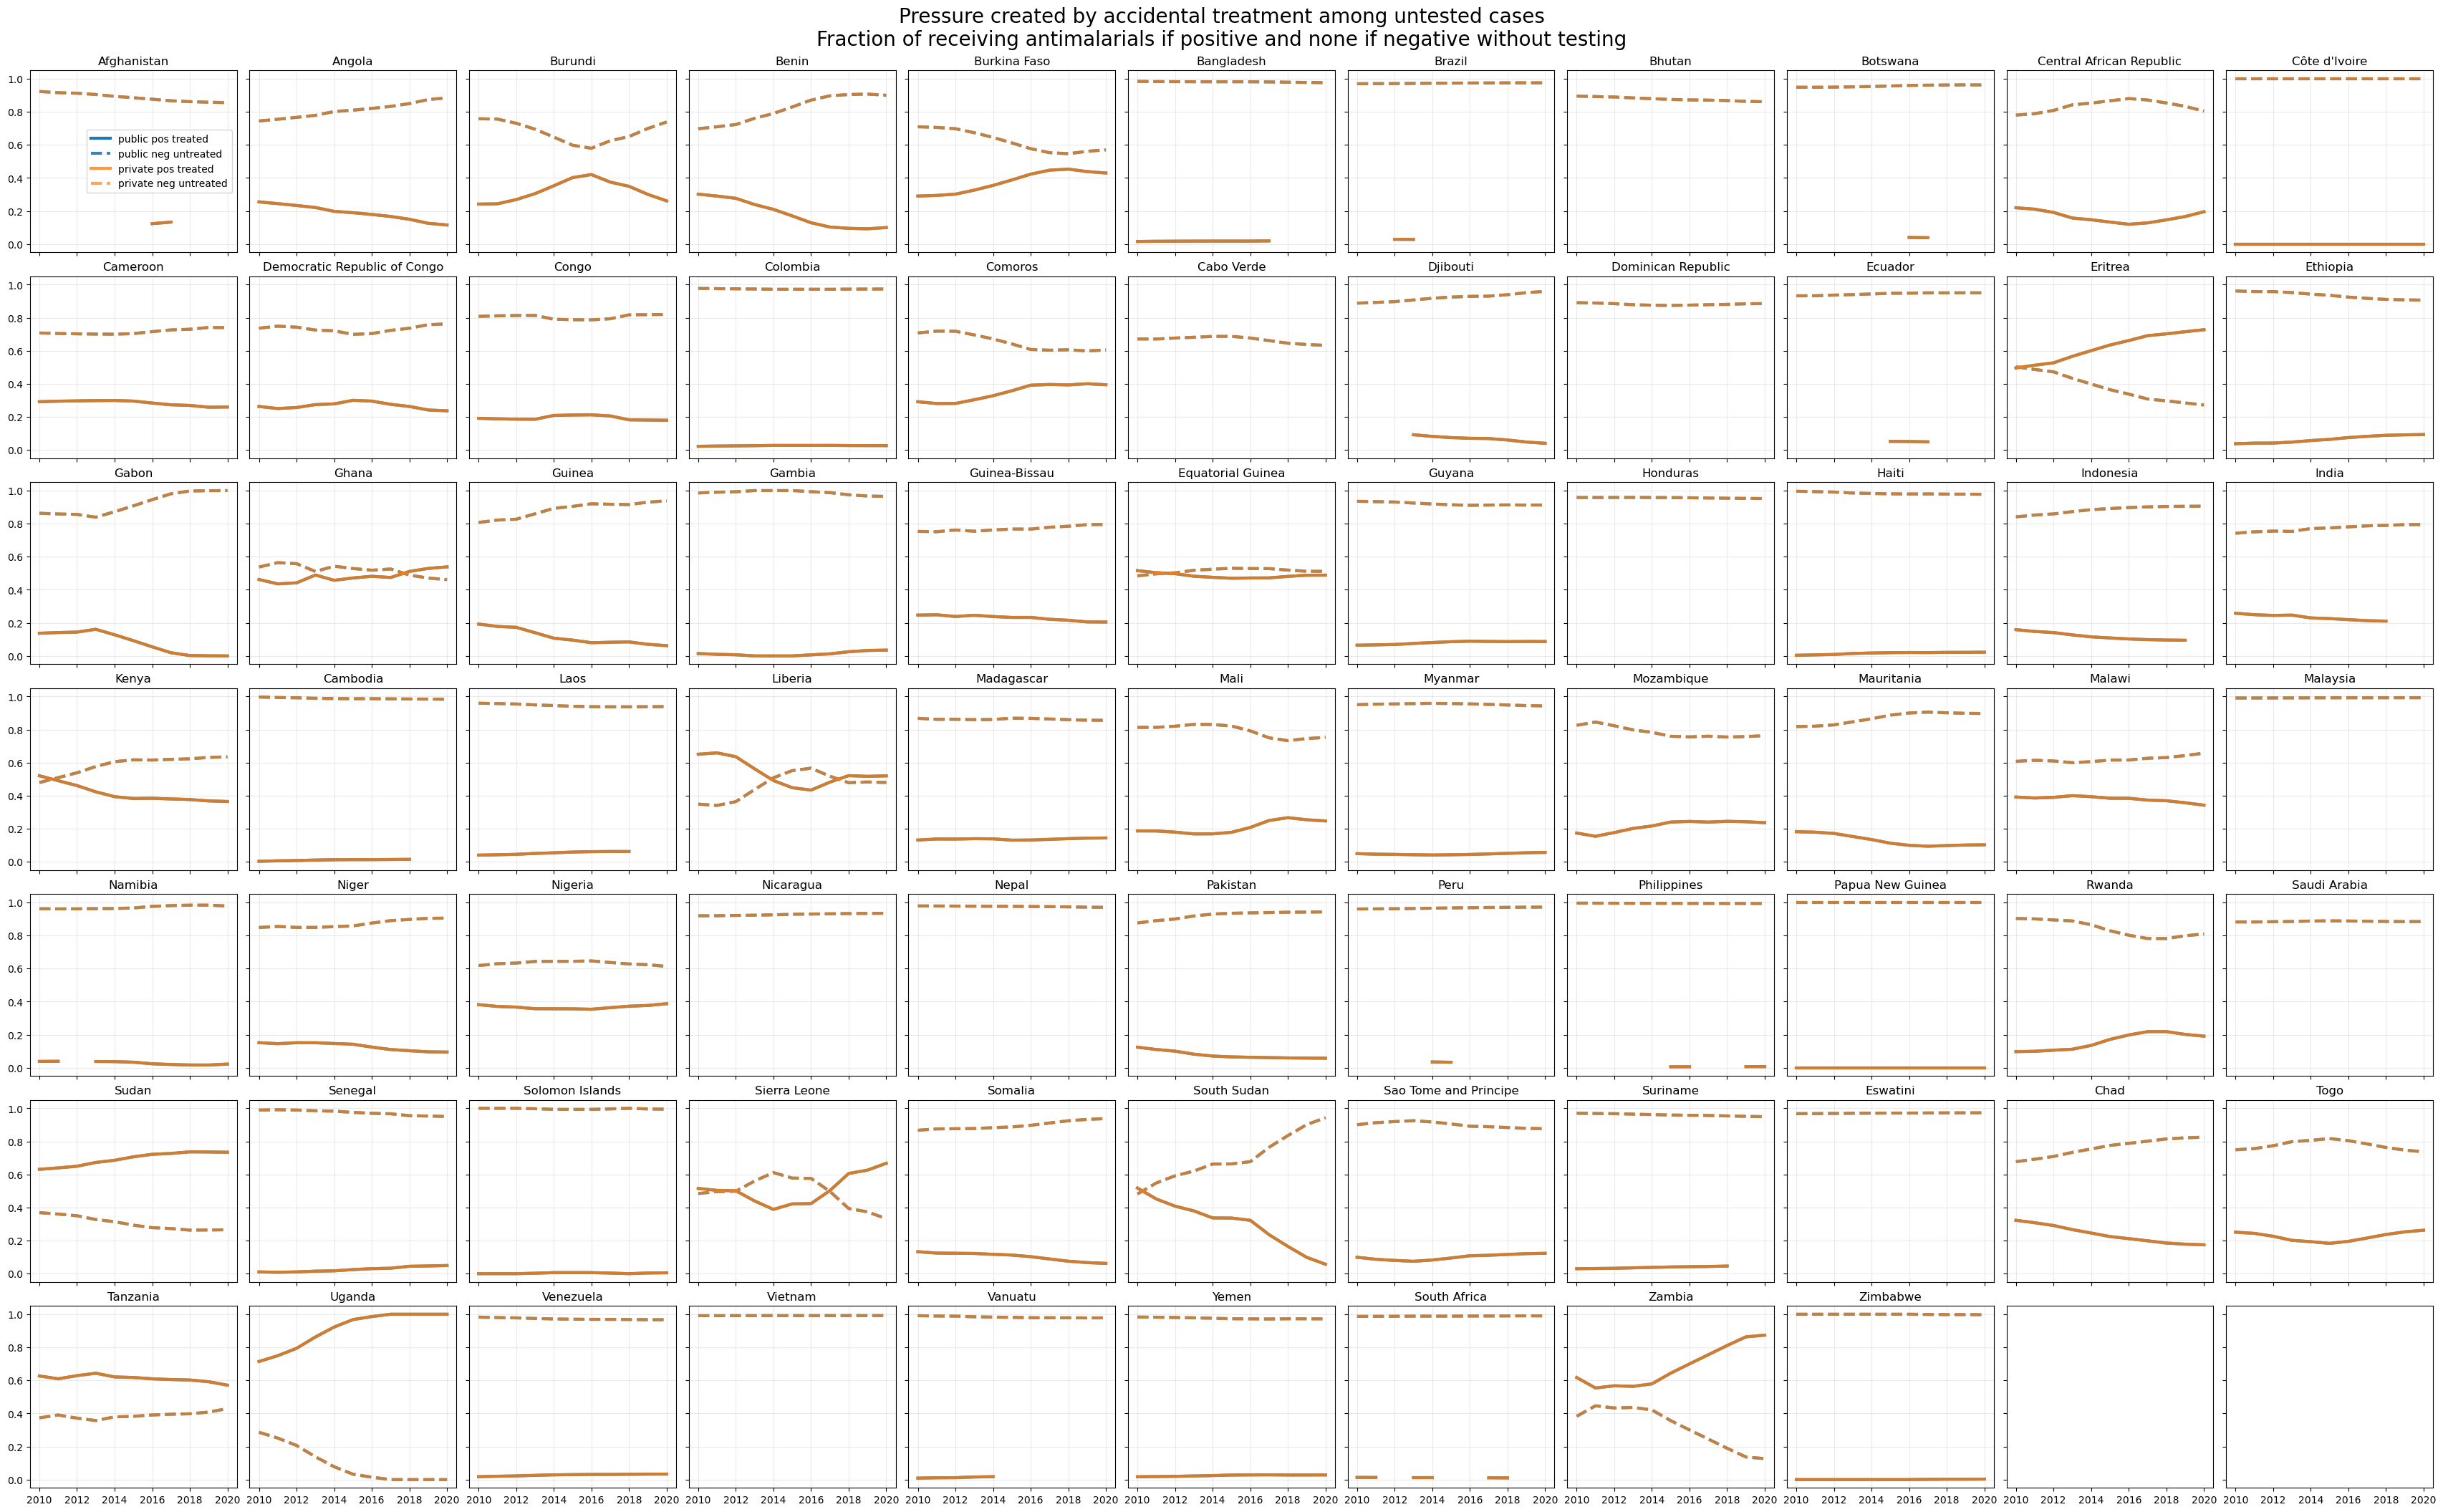

In [104]:
fig, axs = plt.subplots(nrows=7, ncols=11, figsize=(34, 21), sharex=True, sharey=True, constrained_layout=True)

for ic, c in enumerate(countries):
    tmp = model_frac[model_frac['countryIso3']==c]
    axs.flat[ic].plot(tmp['year'], tmp['frac_sought_public_untested_pos_treated'], lw=3, color='tab:blue', ls='-', label='public pos treated')
    axs.flat[ic].plot(tmp['year'], tmp['frac_sought_public_untested_neg_untreated'], lw=3, color='tab:blue', ls='--', label='public neg untreated', alpha=0.9)
    axs.flat[ic].plot(tmp['year'], tmp['frac_sought_private_untested_pos_treated'], lw=3, color='tab:orange', ls='-', label='private pos treated', alpha=0.8)
    axs.flat[ic].plot(tmp['year'], tmp['frac_sought_private_untested_neg_untreated'], lw=3, color='tab:orange', ls='--', label='private neg untreated', alpha=0.7)
    axs.flat[ic].grid(alpha=0.25)
    axs.flat[ic].set_title(tmp.iloc[0]['country'])
axs[0,0].legend()
fig.suptitle('Pressure created by accidental treatment among untested cases\nFraction of receiving antimalarials if positive and none if negative without testing', fontsize=20)
fig.savefig(Path(base_dir, 'task_1/MAP_RDT_Demand_sought_untested_(un)treated.pdf'), dpi=300)

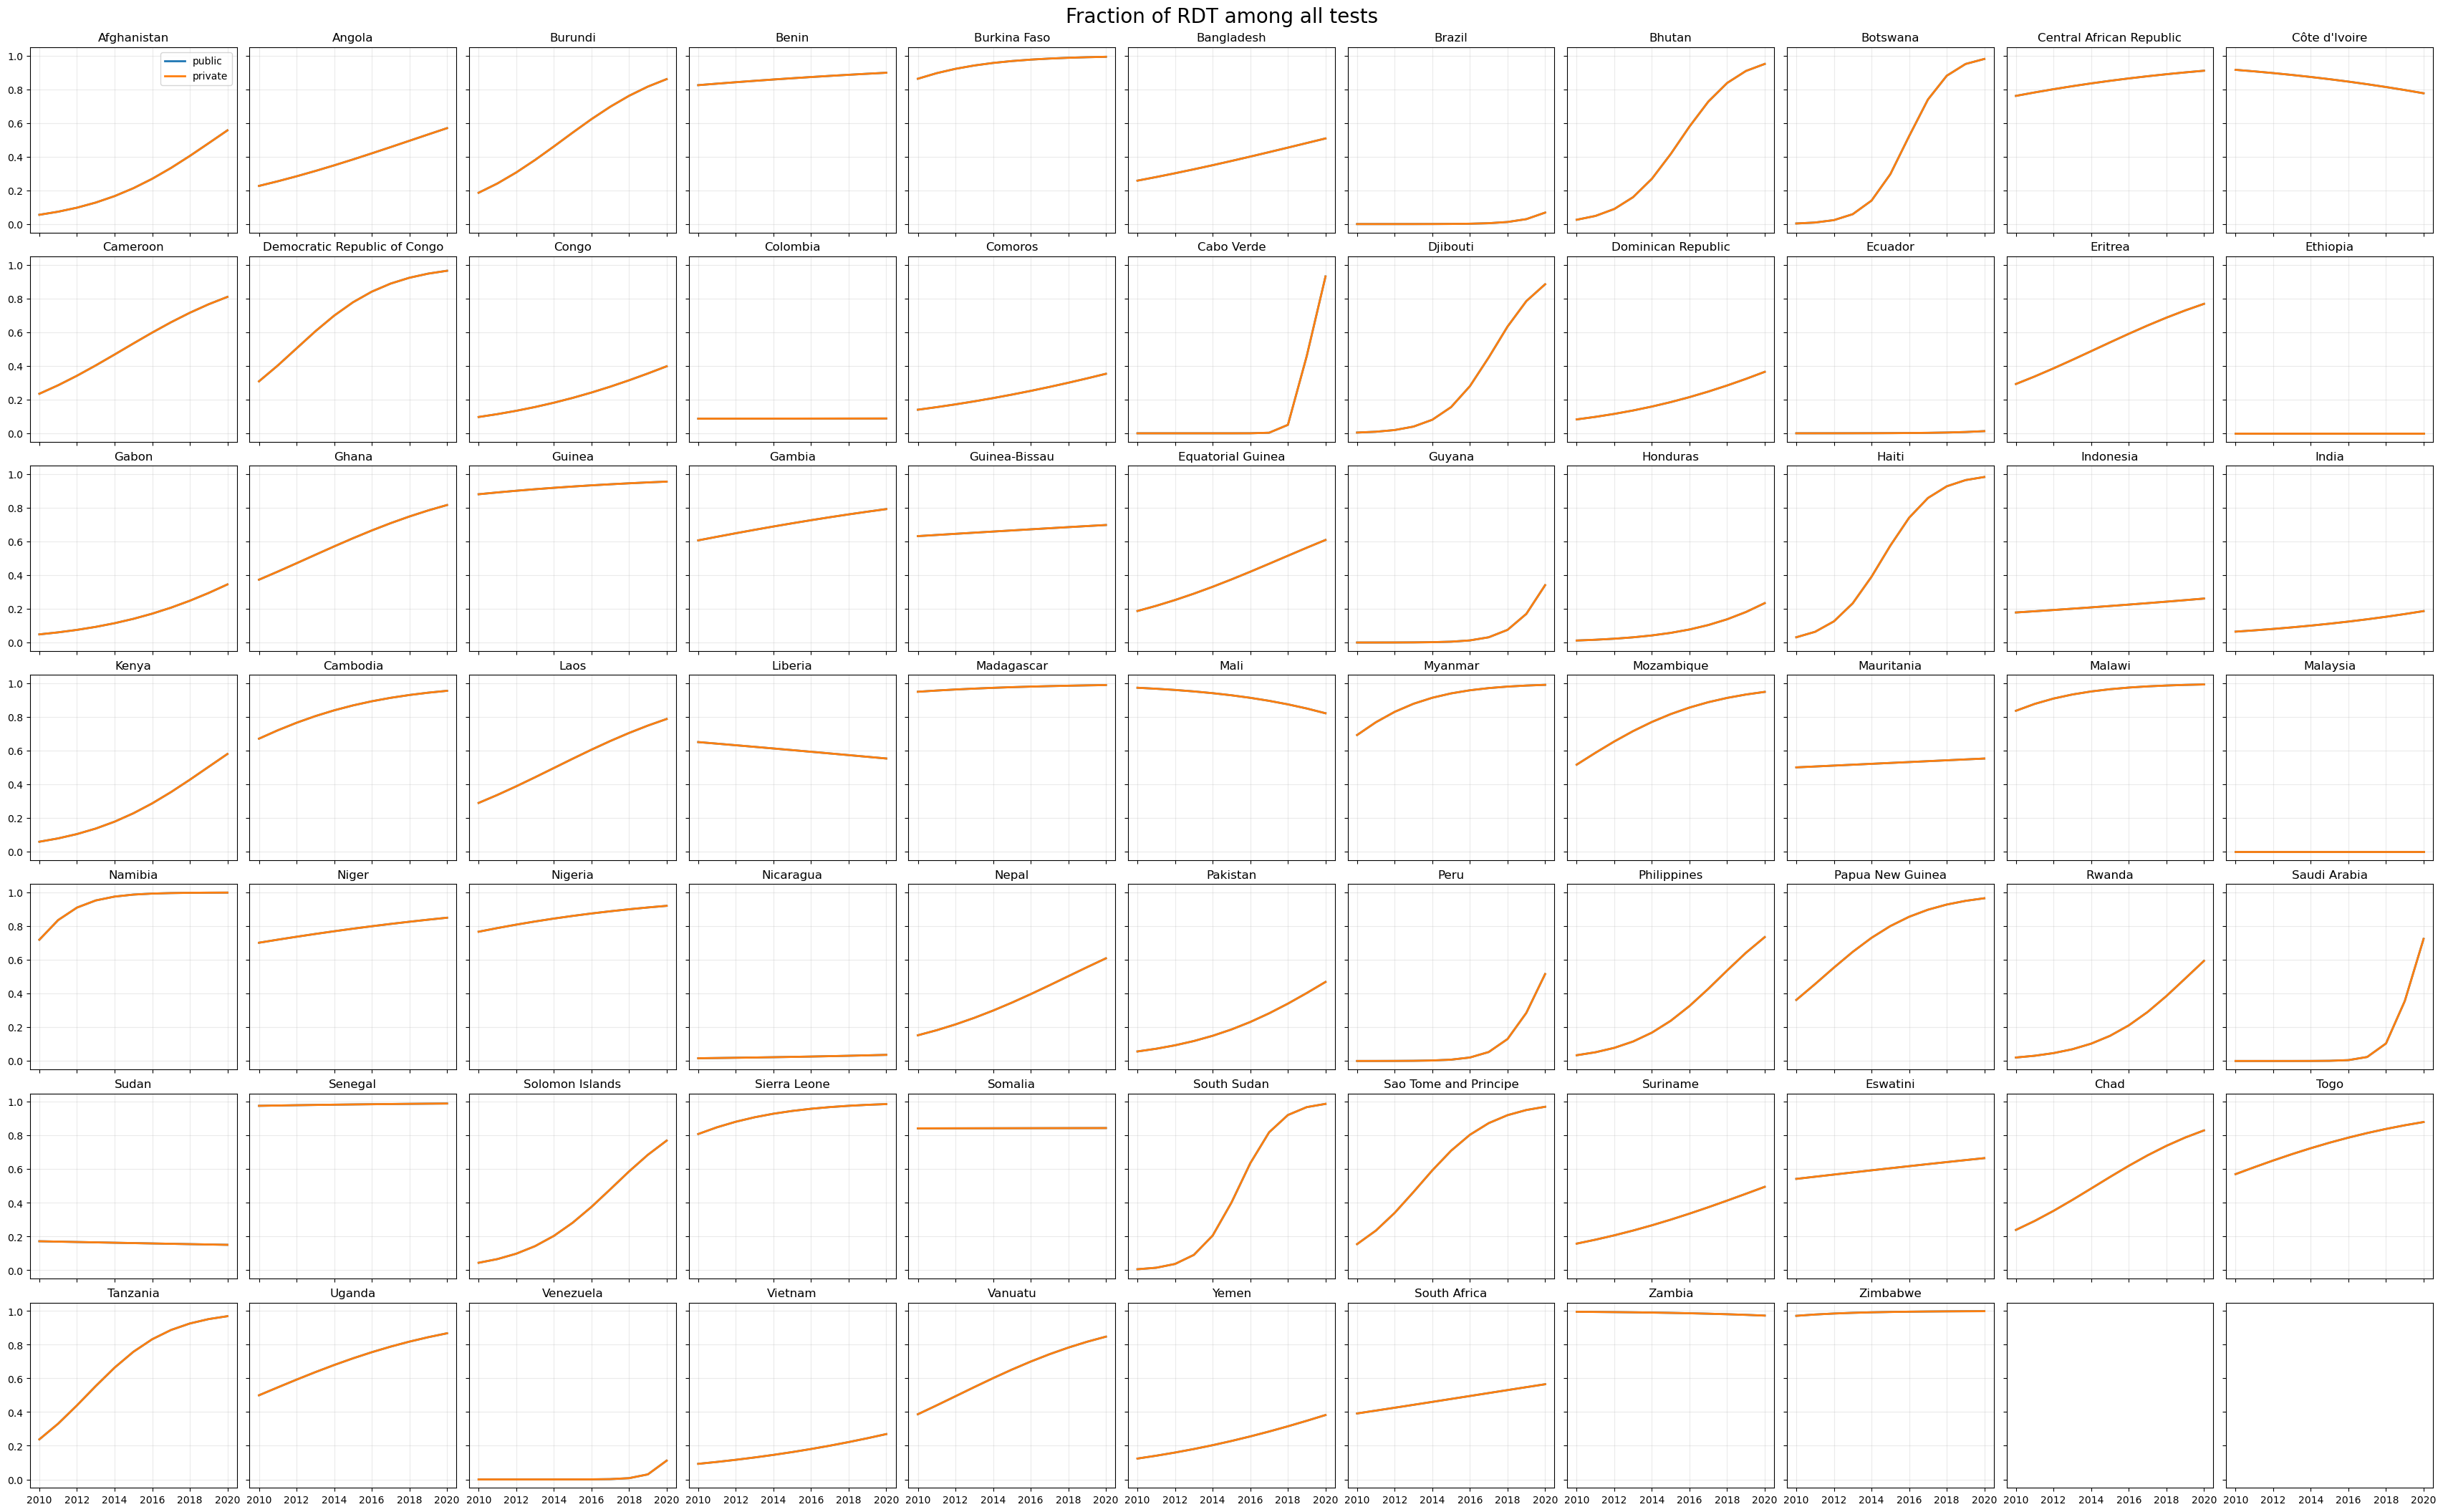

In [105]:
fig, axs = plt.subplots(nrows=7, ncols=11, figsize=(34, 21), sharex=True, sharey=True, constrained_layout=True)

for ic, c in enumerate(countries):
    tmp = model_frac[model_frac['countryIso3']==c]
    axs.flat[ic].plot(tmp['year'], tmp['frac_rdt_public'], lw=2, label='public')
    axs.flat[ic].plot(tmp['year'], tmp['frac_rdt_private'], lw=2, label='private')
    axs.flat[ic].grid(alpha=0.25)
    axs.flat[ic].set_title(tmp.iloc[0]['country'])
axs[0,0].legend()
fig.suptitle('Fraction of RDT among all tests', fontsize=20)
fig.savefig(Path(base_dir, 'task_1/MAP_RDT_Demand_rdt.pdf'), dpi=300)

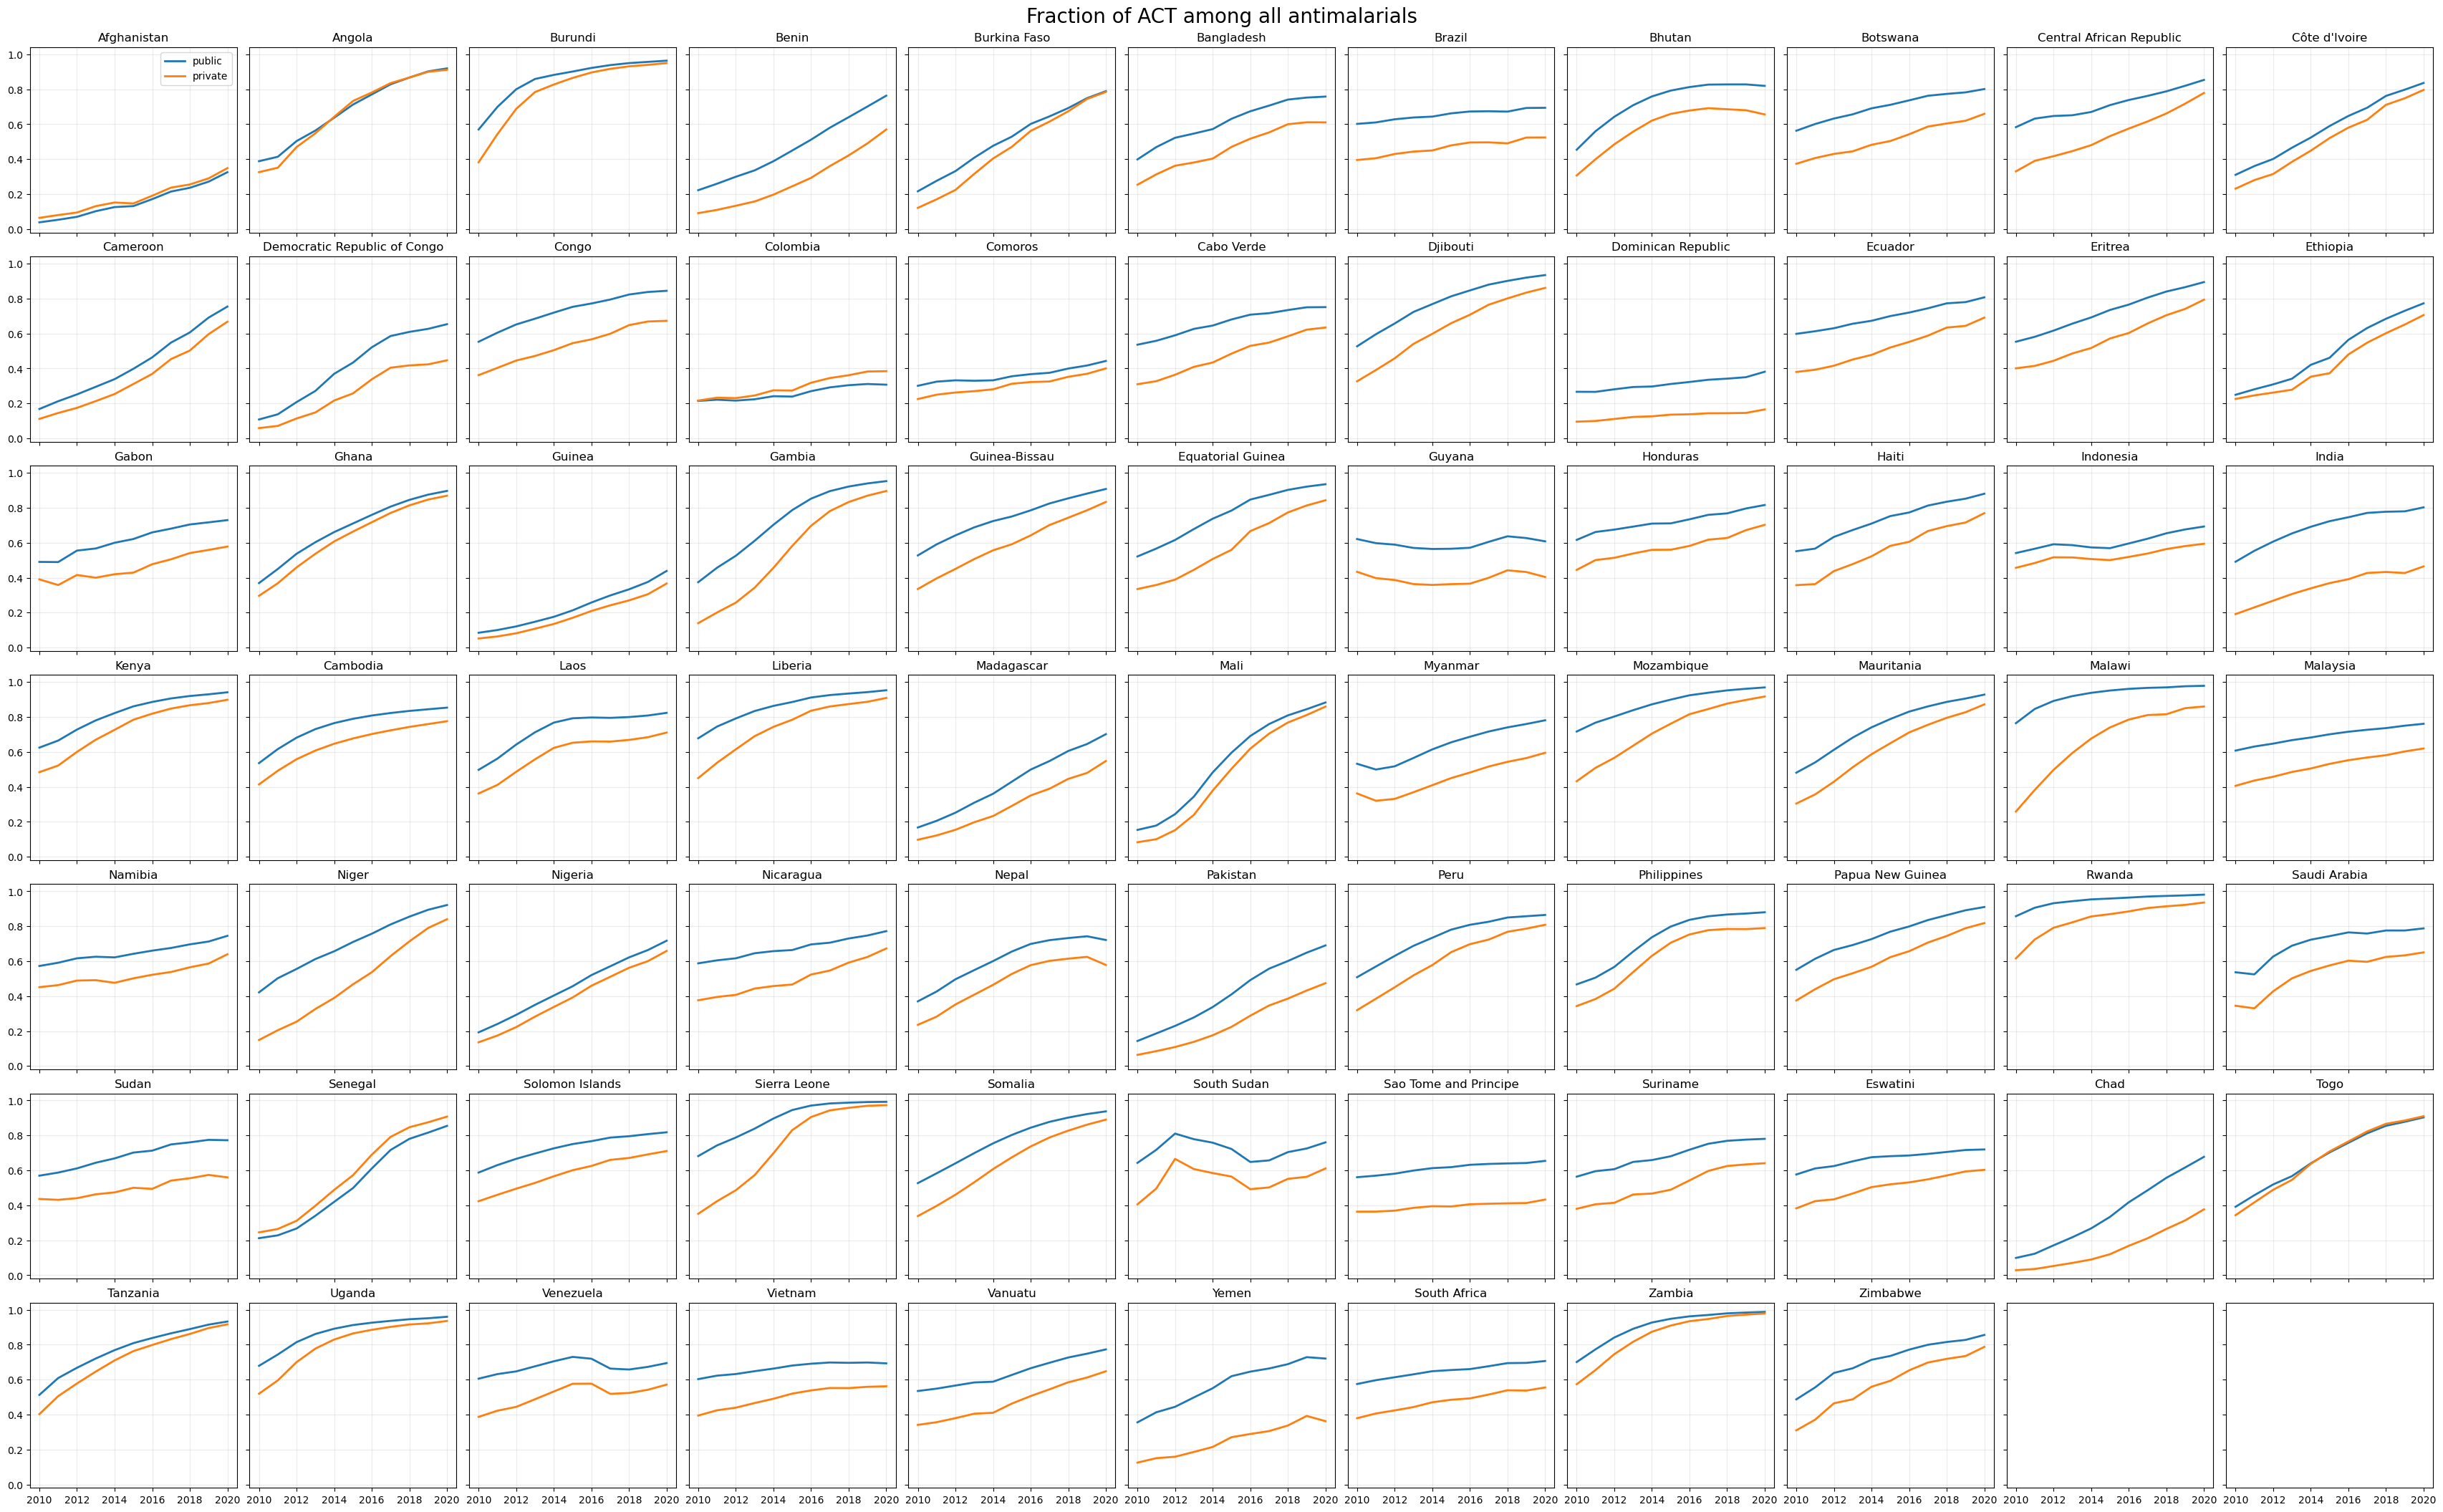

In [106]:
fig, axs = plt.subplots(nrows=7, ncols=11, figsize=(34, 21), sharex=True, sharey=True, constrained_layout=True)

for ic, c in enumerate(countries):
    tmp = model_frac[model_frac['countryIso3']==c]
    axs.flat[ic].plot(tmp['year'], tmp['frac_act_public'], lw=2, label='public')
    axs.flat[ic].plot(tmp['year'], tmp['frac_act_private'], lw=2, label='private')
    axs.flat[ic].grid(alpha=0.25)
    axs.flat[ic].set_title(tmp.iloc[0]['country'])
axs[0,0].legend()
fig.suptitle('Fraction of ACT among all antimalarials', fontsize=20)
fig.savefig(Path(base_dir, 'task_1/MAP_RDT_Demand_act.pdf'), dpi=300)

In [107]:
model_frac.to_csv(Path(base_dir, 'task_1/MAP_fractions.csv'), index=False)